# **Web Scraping et analyse des meilleures ventes sur Amazon**

---

##  **Introduction**
Le commerce √©lectronique a connu une croissance exponentielle ces derni√®res ann√©es, et Amazon est l'une des principales plateformes de vente en ligne. Comprendre les tendances des meilleures ventes sur Amazon peut offrir des **informations pr√©cieuses sur les pr√©f√©rences des consommateurs, l'√©volution des prix et la popularit√© des produits**.

Dans ce projet, nous allons **scraper les premi√®res pages des meilleures ventes** de plusieurs cat√©gories de produits sur Amazon √† l'aide de **BeautifulSoup** et **Requests**. Une fois les donn√©es collect√©es, nous les **nettoierons, explorerons et analyserons** pour en extraire des **tendances et insights**. Nous ferons de m√™me avec une classe sp√©cifique de produits en ajoutant des **caract√©ritiques techniques** bien pr√©cis.

Enfin, nous appliquerons des **mod√®les de Machine Learning** pour identifier des sch√©mas cach√©s et faire des pr√©dictions sur les tendances des produits et quels produits finiront dans les **Best Sellers**.

---

## **Plan du projet**

### *1.Collecte des donn√©es*

Nous allons r√©cup√©rer les informations des produits des premi√®res pages des meilleurs ventes Amazon pour plusieurs cat√©gories.

Nous allons commencer par extraite seulement le nom du produit pour une seule cat√©gorie, puis plus d'√©l√©ments ( prix, √©valuation, nombre d'avis, classement, url), puis plus de cat√©gories, et enfin nous essaierons de prendre en compte plusieurs pages.

Nous allons √©galement extraire une base de donn√©es des caract√©ristiques techniques des cartes graphiques vendues sur Amazon.




### *2.Nettoyage et pr√©paration des donn√©es*

Nous allons supprimer les valeurs manquantes et les doublons, convertir au bon format les valeurs et v√©rifier s'il existe des valeurs aberrantes



### *3.Analyse exploratoire des donn√©es*

Nous allons rechercher des relations sur la distribution entre les variables, comme la corr√©lation entre le prix et la cat√©gorie, le nombre d'avis et l'√©valuation, etc...

Nous allons √©galement essayer d'identifier les produits sous-√©valu√©s ou sur√©valu√©s.



### *4.Pr√©dictions et Machine Learning*

Nous allons tester des mod√©lisations pour faire des pr√©dictions sur les produits (r√©gression, classification...) pour essayer d'extraire les caract√©ristiques techniques qui sont importantes pour le succ√®s d'un produit technologique.



### *5.Tableau de bord et interpr√©tation*

Faire un rapport final et interpr√©ter les r√©sultats pour conclure.


---

## **Sommaire**

### 1. Construction et √©tude pr√©liminaire d'une base de donn√©es de Best Sellers d'Amazon
- [1.1 Construction de la base de donn√©es Best Sellers](#11-Construction-de-la-base-de-donn√©es-Best-Sellers)
  - [1.1.1 Pour une seule page, une seule cat√©gorie et une seule information](#111-Pour-une-seule-page-une-seule-cat√©gorie-et-une-seule-information)
  - [1.1.2 Pour une seule page, plusieurs cat√©gories et deux informations](#112-Pour-une-seule-page-plusieurs-cat√©gories-et-deux-informations)
  - [1.1.3 Pour une seule page, plusieurs cat√©gories et plusieurs informations](#113-Pour-une-seule-page-plusieurs-cat√©gories-et-plusieurs-informations)
  - [1.1.4 Pour plusieurs pages, plusieurs cat√©gories et plusieurs informations](#114-Pour-plusieurs-pages-plusieurs-cat√©gories-et-plusieurs-informations)

- [1.2 Traitement de notre base de donn√©es Best Sellers](#12-Traitement-de-notre-base-de-donn√©es-Best-Sellers)
  - [1.2.1 Conversion num√©rique des colonnes](#121-Conversion-num√©rique-des-colonnes)
  - [1.2.2 Analyse graphique des donn√©es](#122-Analyse-graphique-des-donn√©es)

### 2. Construction et √©tude d'une base de caract√©ristiques techniques des cartes graphiques d'Amazon
- [2.1 Construction et √©tude de la base prix/avis de cartes graphiques](#21-Construction-et-√©tude-de-la-base-prixavis-de-cartes-graphiques)
  - [2.1.1 R√©cup√©ration des caract√©ristiques primaires et URL](#211-R√©cup√©ration-des-caract√©ristiques-primaires-et-URL)
  - [2.1.2 Nettoyage de la base](#212-Nettoyage-de-la-base)
  - [2.1.3 √âtude graphique pr√©liminaire](#213-√âtude-graphique-pr√©liminaire)

- [2.2 Construction et √©tude de la base des caract√©ristiques techniques](#22-Construction-et-√©tude-de-la-base-des-caract√©ristiques-techniques)





---

## **Pipeline du projet**

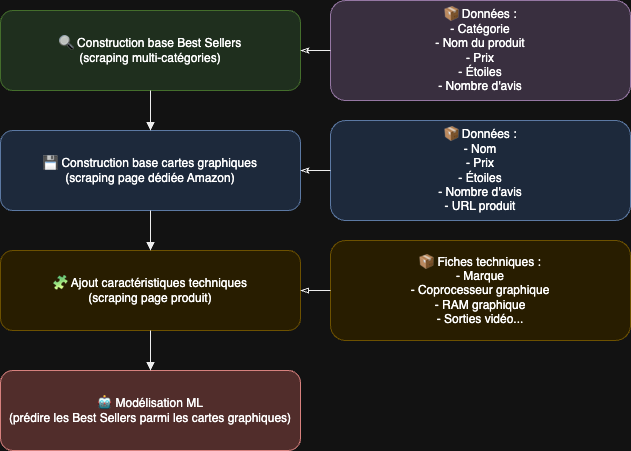



---

## **1 Construction et √©tude pr√©liminaire d'une base de donn√©e de Best Sellers d'Amazon**

Nous allons utiliser les m√©thodes apprises avec beautifulsoup pour extraire des informations du code HTML des pages de bestsellers d'Amazon

In [ ]:
pip install requests beautifulsoup4 pandas plotly


In [ ]:
pip install -U kaleido


In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
from IPython.display import display, Markdown
import kaleido

### ***1.1 Construction de la base de donn√©e Best Sellers***

On va petit √† petit extraire la base de donn√©es des Best Sellers

#### *1.1.1 Pour une seule page, une seule cat√©gorie et une seule information*

On va commencer par extraire seulement le nom des produits de la premi√®re page des meilleures ventes en √©lectronique pour s'habituer au fonctionnement du code HTML du site.

Le nom de la classe du nom des produits varie mais contient toujours la suite de caract√®res "p13n-sc-css", on va donc rechercher cette suite gr√¢ce √† la biblioth√®que d'expressions r√©guli√®res.

In [ ]:

# URL de la page des meilleures ventes en √©lectronique
url = "https://www.amazon.fr/gp/bestsellers/electronics"

# User-Agent pour √©viter le blocage par Amazon
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36",
    "Accept-Language": "fr-FR,fr;q=0.9"
}

# Envoyer la requ√™te GET
response = requests.get(url, headers=headers)

# V√©rifier si la requ√™te a r√©ussi
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Liste pour stocker les noms de produits
    product_names = []

    # Chercher tous les √©l√©ments avec une classe contenant "p13n-sc-css"
    for product in soup.find_all(class_=lambda value: value and "p13n-sc-css" in value):
        # Extraire le nom du produit
        product_name = product.text.strip()

        # Ajouter le nom du produit √† la liste
        product_names.append(product_name)


    # Afficher les noms des produits
    print(" Meilleures ventes en √âlectronique sur Amazon :\n")
    for idx, product_name in enumerate(product_names, start=1):
        print(f"{idx}. {product_name}")

else:
    print(f" Erreur : Impossible d'acc√©der √† la page. Code {response.status_code}")

 Meilleures ventes en √âlectronique sur Amazon :

1. Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) | TV gratuite et en direct, t√©l√©commande vocale Alexa, contr√¥le de la maison connect√©e, streaming HD
2. Tapo 2K(3MP) Cam√©ra Surveillance WiFi int√©rieure 360¬∞ C210, Vision nocturne, Notifications en temps r√©el, D√©tection de personne, Suivi de mouvement, T√©l√©commande, Compatible avec Alexa
3. Aioneus Chargeur USB C, 40W 4 Port Prise USBC Chargeur Rapide iPhone, Multi Secteur PD+QC 3.1A Type C Adaptateur pour iPhone 16 15 14 13 12 11 Pro Max X XS XR 8 7 6S Plus Mini SE, iPad,Samsung Galaxy
4. Apple AirTag
5. INIU Batterie Externe, 22.5W 10000mAh Power Bank, Batterie Portable USB C Input & Output PD3.0 QC4.0 Charge Rapide Powerbank Compatible avec iPhone 16 15 14 13 12 Pro Max Plus Samsung iPad Pro etc
6. Imou 2K(3MP) Cam√©ra Surveillance WiFi Int√©rieure Cam√©ra 360¬∞ Connect√©e Smartphone avec D√©tection Humaine AI Suivi Intelligent Sir√®ne Audio Bidirectionnel Compatible Alexa

On va faire pareil pour le prix en recherchant la suite de caract√®res "p13n-sc-price"




In [ ]:
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Liste pour stocker les noms de produits
    product_prices = []

    # Chercher tous les √©l√©ments avec une classe contenant "p13n-sc-price"
    for product in soup.find_all(class_=lambda value: value and "p13n-sc-price" in value):
        # Extraire le nom du produit
        product_price = product.text.strip()

        # Ajouter le nom du produit √† la liste
        product_prices.append(product_price)


    # Afficher les noms des produits
    print("Prix des meilleures ventes en √âlectronique sur Amazon :\n")
    for idx, product_price in enumerate(product_prices, start=1):
        print(f"{idx}. {product_price}")

else:
    print(f"‚ö†Ô∏è Erreur : Impossible d'acc√©der √† la page. Code {response.status_code}")

Prix des meilleures ventes en √âlectronique sur Amazon :

1. 44,99¬†‚Ç¨
2. 16,58¬†‚Ç¨
3. 16,58¬†‚Ç¨
4. 9,99¬†‚Ç¨
5. 9,99¬†‚Ç¨
6. 30,07¬†‚Ç¨
7. 16,64¬†‚Ç¨
8. 17,50¬†‚Ç¨
9. 6,66¬†‚Ç¨
10. 6,66¬†‚Ç¨
11. 116,48¬†‚Ç¨
12. 6,66¬†‚Ç¨
13. 6,66¬†‚Ç¨
14. 37,44¬†‚Ç¨
15. 10,99¬†‚Ç¨
16. 5,53¬†‚Ç¨
17. 12,99¬†‚Ç¨
18. 12,99¬†‚Ç¨
19. 10,80¬†‚Ç¨
20. 10,80¬†‚Ç¨
21. 16,82¬†‚Ç¨
22. 14,99¬†‚Ç¨
23. 14,99¬†‚Ç¨
24. 7,56¬†‚Ç¨
25. 7,56¬†‚Ç¨
26. 16,99¬†‚Ç¨
27. 16,99¬†‚Ç¨
28. 101,90¬†‚Ç¨
29. 101,90¬†‚Ç¨
30. 5,04¬†‚Ç¨
31. 8,32¬†‚Ç¨
32. 8,32¬†‚Ç¨
33. 15,04¬†‚Ç¨
34. 11,99¬†‚Ç¨
35. 28,19¬†‚Ç¨
36. 12,91¬†‚Ç¨
37. 12,91¬†‚Ç¨
38. 6,64¬†‚Ç¨
39. 28,29¬†‚Ç¨
40. 179,99¬†‚Ç¨
41. 99,00¬†‚Ç¨


---

#### *1.1.2 Pour une seule page, plusieurs cat√©gories et deux informations*

On va faire une boucle for sur plusieurs cat√©gories en appliquant le m√™me code que pr√©c√©demment.

In [ ]:
# Headers pour √©viter d'√™tre bloqu√© par Amazon (changer de User-Agent r√©guli√®rement)

headers_list = [
    {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"},
    {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"},
    {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36"}
]

In [ ]:
# D√©finition des cat√©gories et des URLs associ√©es
categories = {
    "High-Tech": "https://www.amazon.fr/gp/bestsellers/electronics",
    "Livres": "https://www.amazon.fr/gp/bestsellers/books",
    "Mode": "https://www.amazon.fr/gp/bestsellers/fashion",
    "Maison & Cuisine": "https://www.amazon.fr/gp/bestsellers/kitchen",
    "Jeux et Jouets": "https://www.amazon.fr/gp/bestsellers/toys"
}

# Liste pour stocker les r√©sultats
produits = []

In [ ]:
# Fonction pour scraper une cat√©gorie Amazon

def scraper_categorie(nom_categorie, url):
    produits_scrapes = 0

    while produits_scrapes < 30: # Limite de scraping
        print(f"Scraping de la cat√©gorie {nom_categorie}...")

        # Rotation des User-Agent pour ne pas √™tre bloqu√©
        headers = random.choice(headers_list)

        # Envoyer la requ√™te HTTP
        response = requests.get(url, headers=headers)

        # V√©rifier si la requ√™te est bloqu√©e
        if response.status_code != 200:
            print(f"‚ö†Ô∏è Acc√®s bloqu√© pour {nom_categorie}. Code: {response.status_code}")
            break

        soup = BeautifulSoup(response.text, "html.parser")

        # Trouver les produits
        items = soup.find_all("div", class_="p13n-sc-uncoverable-faceout")

        for item in items:
            if produits_scrapes >= 30:
                break  # Stop si on atteint 30 produits

            try:
                nom = item.find(class_=lambda value: value and "p13n-sc-css" in value).text.strip()
            except:
                nom = "Non Disponible"

            try:
                prix = item.find(class_=lambda value: value and "p13n-sc-price" in value).text.strip()
            except:
                prix = "Non Disponible"

            # Stocker les informations du produit
            produits.append({
                "Cat√©gorie": nom_categorie,
                "Nom du Produit": nom,
                "Prix": prix,
            })
            produits_scrapes += 1


In [ ]:
# Ex√©cution du scraping pour chaque cat√©gorie
for categorie, url in categories.items():
    scraper_categorie(categorie, url)


Scraping de la cat√©gorie High-Tech...
Scraping de la cat√©gorie Livres...
Scraping de la cat√©gorie Livres...
Scraping de la cat√©gorie Livres...
Scraping de la cat√©gorie Mode...
Scraping de la cat√©gorie Mode...
Scraping de la cat√©gorie Mode...
Scraping de la cat√©gorie Mode...
Scraping de la cat√©gorie Mode...
Scraping de la cat√©gorie Mode...
Scraping de la cat√©gorie Maison & Cuisine...
Scraping de la cat√©gorie Maison & Cuisine...
Scraping de la cat√©gorie Jeux et Jouets...
Scraping de la cat√©gorie Jeux et Jouets...
Scraping de la cat√©gorie Jeux et Jouets...
Scraping de la cat√©gorie Jeux et Jouets...
Scraping de la cat√©gorie Jeux et Jouets...
Scraping de la cat√©gorie Jeux et Jouets...



Pour pouvoir l'√©tudier ult√©rieurement, on va construire une base de donn√©es df avec panda contenant les informations que nous avons r√©cup√©r√©.

In [ ]:
# Sauvegarde des donn√©es en CSV
df = pd.DataFrame(produits)
#df.to_csv("Table_1.csv", index=False, encoding="utf-8")
print("‚úÖ Scraping termin√© ! Les donn√©es sont enregistr√©es dans 'Table_1.csv'.")


‚úÖ Scraping termin√© ! Les donn√©es sont enregistr√©es dans 'Table_1.csv'.


In [ ]:
df = pd.read_csv("Table_1.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cat√©gorie       150 non-null    object
 1   Nom du Produit  150 non-null    object
 2   Prix            150 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [ ]:
df.head(50)

Cat√©gorie                                     Nom du Produit      Prix
0   High-Tech  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...   44,99¬†‚Ç¨
1   High-Tech  Tapo 2K(3MP) Cam√©ra Surveillance WiFi int√©rieu...   16,58¬†‚Ç¨
2   High-Tech  Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...    9,99¬†‚Ç¨
3   High-Tech                                       Apple AirTag   30,07¬†‚Ç¨
4   High-Tech  INIU Batterie Externe, 22.5W 10000mAh Power Ba...   16,22¬†‚Ç¨
5   High-Tech  Imou 2K(3MP) Cam√©ra Surveillance WiFi Int√©rieu...   18,99¬†‚Ç¨
6   High-Tech  Batterie Externe 20000mAh 22.5W PD3.0 QC4.0 Po...   10,99¬†‚Ç¨
7   High-Tech  JBL GO 4, Enceinte Bluetooth ultra-portable, s...   37,44¬†‚Ç¨
8   High-Tech  Duracell Plus Piles AAA (lot de 12) - Alcaline...    6,66¬†‚Ç¨
9   High-Tech  Chargeur for iPhone 14/14 Pro /14 Pro Max /14 ...   12,99¬†‚Ç¨
10  High-Tech  Amazon Basics Lot de 40 piles alkaline AA indu...   10,80¬†‚Ç¨
11  High-Tech  Apple AirPods 4 √âcouteurs sans Fil, Casques et...  116,73¬†‚Ç¨
12  High-Tech  Duracell Plus Piles AA (lot de 12) - Alcalines...    6,66¬†‚Ç¨
13  High-Tech  DURACELL CR2032 Piles Boutons au lithium 3V (l...    5,53¬†‚Ç¨
14  High-Tech  Energizer Piles AAA, Alkaline Power, Lot de 16...    9,16¬†‚Ç¨
15  High-Tech    Apple EarPods avec connecteur Lightning ‚Äã‚Äã‚Äã‚Äã‚Äã‚Äã‚Äã   16,82¬†‚Ç¨
16  High-Tech  VARTA Piles Bouton CR2032, lot de 5, Power on ...    7,56¬†‚Ç¨
17  High-Tech          Energizer Lithium Batteries 2032 - 6 pack    5,04¬†‚Ç¨
18  High-Tech                             Apple Lot de 4 AirTags  115,00¬†‚Ç¨
19  High-Tech  FNTCASE Coque pour iPhone 13 : iPhone 14 iPhon...    8,32¬†‚Ç¨
20  High-Tech  Lot de 2 pour Chargeur Rapide iPhone, 20W PD U...   14,99¬†‚Ç¨
21  High-Tech  DURACELL CR2032 Piles Boutons au lithium 3V (l...    9,94¬†‚Ç¨
22  High-Tech  Nouvel Amazon Kindle Paperwhite (16 Go) | Notr...  179,99¬†‚Ç¨
23  High-Tech  SAMSUNG Galaxy A05s 4GB+64GB [Version Internat...   99,97¬†‚Ç¨
24  High-Tech  Ecouteurs Bluetooth sans Fil,Bluetooth 5.3 Eco...   16,99¬†‚Ç¨
25  High-Tech  Power Bank 27000mAh 22.5W PD3.0 QC4.0 Batterie...   16,99¬†‚Ç¨
26  High-Tech  Apple AirPods Pro 2 √âcouteurs sans Fil, Casque...  224,66¬†‚Ç¨
27  High-Tech  JBL TUNE 510BT ‚Äì Casque supra-auriculaire sans...   28,29¬†‚Ç¨
28  High-Tech  Energizer Piles AA, Alkaline Power, Lot de 24,...   12,91¬†‚Ç¨
29  High-Tech  Adaptateur CarPlay sans fil pour Apple iPhone,...   29,99¬†‚Ç¨
30     Livres                                     Int√©rieur nuit   17,06¬†‚Ç¨
31     Livres                  Les secrets de la femme de m√©nage    8,15¬†‚Ç¨
32     Livres                                 La femme de m√©nage    8,15¬†‚Ç¨
33     Livres       KRAKEN: Syst√®me politique de l'√®re num√©rique    9,47¬†‚Ç¨
34     Livres                             L'heure des pr√©dateurs   18,01¬†‚Ç¨
35     Livres           One Piece - √âdition originale - Tome 109    6,82¬†‚Ç¨
36     Livres                        La femme de m√©nage se marie    4,64¬†‚Ç¨
37     Livres                       La femme de m√©nage voit tout   20,85¬†‚Ç¨
38     Livres      Hunger Games : Lever de soleil sur la moisson   18,86¬†‚Ç¨
39     Livres                                           Antigone    6,16¬†‚Ç¨
40     Livres               La Tr√®s Catastrophique Visite du Zoo   18,01¬†‚Ç¨
41     Livres  Coloriages myst√®res Disney - H√©ros & M√©chants,...   13,29¬†‚Ç¨
42     Livres                                 Lakestone - tome 2   18,96¬†‚Ç¨
43     Livres  Votre sant√© optimis√©e: Le protocole quotidien ...   18,86¬†‚Ç¨
44     Livres  Toutes les mati√®res 3e - Ma Compil fiches Brev...   11,36¬†‚Ç¨
45     Livres  La mort en face: Dr. Philippe Boxho, le m√©deci...   18,86¬†‚Ç¨
46     Livres                     L'art et la cr√©ation de Arcane  134,99¬†‚Ç¨
47     Livres                                         Les #Gueux    4,64¬†‚Ç¨
48     Livres  H: Le nouveau thriller √©v√©nement de Bernard Mi...   21,71¬†‚Ç¨
49     Livres                                  Solo Leveling 

In [ ]:
df.describe()

Cat√©gorie                                     Nom du Produit    Prix
count         150                                                150     150
unique          5                                                150     117
top     High-Tech  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...  9,99¬†‚Ç¨
freq           30                                                  1       4

---

#### *1.1.3 Pour une seule page, plusieurs cat√©gories et plusieurs informations*

On va rajouter des cat√©gories et des informations pour avoir un dataframe plus complet. On va ajouter le classement, l'√©valuation, le nombre d'avis et l'url du produit.

In [ ]:
# On va ajouter des cat√©gories
categories = {
    "High-Tech": "https://www.amazon.fr/gp/bestsellers/electronics",
    "Livres": "https://www.amazon.fr/gp/bestsellers/books",
    "Mode": "https://www.amazon.fr/gp/bestsellers/fashion",
    "Maison & Cuisine": "https://www.amazon.fr/gp/bestsellers/kitchen",
    "Jeux et Jouets": "https://www.amazon.fr/gp/bestsellers/toys",
    "Sport & Loisirs": "https://www.amazon.fr/gp/bestsellers/sports",
    "Beaut√© et Sant√©": "https://www.amazon.fr/gp/bestsellers/beauty",
    "Auto et Moto": "https://www.amazon.fr/gp/bestsellers/automotive",
    "Montres et Bijoux": "https://www.amazon.fr/gp/bestsellers/watches", #Cette cat√©gorie ne contient aucun bestsellers, il faut ajouter un break
    "Informatique": "https://www.amazon.fr/gp/bestsellers/computers"
}

# Liste pour stocker les r√©sultats
produits = []

In [ ]:
# Fonction pour scraper une cat√©gorie Amazon, on rajoute des informations

def scraper_categorie(nom_categorie, url):
    produits_scrapes = 0

    while produits_scrapes < 30: # Limite de scraping
        print(f"Scraping de la cat√©gorie {nom_categorie}...")

        # Rotation des User-Agent pour ne pas √™tre bloqu√©
        headers = random.choice(headers_list)

        # Envoyer la requ√™te HTTP
        response = requests.get(url, headers=headers)

        # V√©rifier si la requ√™te est bloqu√©e
        if response.status_code != 200:
            print(f"‚ö†Ô∏è Acc√®s bloqu√© pour {nom_categorie}. Code: {response.status_code}")
            break

        soup = BeautifulSoup(response.text, "html.parser")


        # Trouver les produits
        items = soup.find_all("div", class_="p13n-sc-uncoverable-faceout")

           # V√©rifier si la cat√©gorie contient des produits, sinon arr√™ter
        if not items:
            print(f"Aucun produit trouv√© pour la cat√©gorie {nom_categorie}. Passage √† la suivante.")
            return  # Arr√™t du scraping pour cette cat√©gorie

        for item in items:
            if produits_scrapes >= 30:
                break  # Stop si on atteint 30 produits

            try:
                nom = item.find(class_=lambda value: value and "p13n-sc-css" in value).text.strip()
            except:
                nom = "Non Disponible"

            try:
                prix = item.find(class_=lambda value: value and "p13n-sc-price" in value).text.strip()
            except:
                prix = "Non Disponible"

            try:
                etoiles = item.find(class_=lambda value: value and "a-icon-alt" in value).text.strip()
            except:
                etoiles = "Non Disponible"

            try:
                nb_avis = item.find(class_=lambda value: value and "a-size-small" in value).text.strip()
            except:
                nb_avis = "0"

            try:
                url_produit = "https://www.amazon.fr" + item.find("a", class_="a-link-normal")["href"]
            except:
                url_produit = "Non Disponible"

            # Stocker les informations du produit
            produits.append({
                "Cat√©gorie": nom_categorie,
                "Nom du Produit": nom,
                "Prix": prix,
                "√âvaluation (√©toiles)": etoiles,
                "Nombre d'Avis": nb_avis,
                "URL": url_produit
            })
            produits_scrapes += 1

In [ ]:
# Ex√©cution du scraping pour chaque cat√©gorie
for categorie, url in categories.items():
    scraper_categorie(categorie, url)


Scraping de la cat√©gorie High-Tech...
Aucun produit trouv√© pour la cat√©gorie High-Tech. Passage √† la suivante.
Scraping de la cat√©gorie Livres...
Aucun produit trouv√© pour la cat√©gorie Livres. Passage √† la suivante.
Scraping de la cat√©gorie Mode...
Aucun produit trouv√© pour la cat√©gorie Mode. Passage √† la suivante.
Scraping de la cat√©gorie Maison & Cuisine...
Aucun produit trouv√© pour la cat√©gorie Maison & Cuisine. Passage √† la suivante.
Scraping de la cat√©gorie Jeux et Jouets...
Aucun produit trouv√© pour la cat√©gorie Jeux et Jouets. Passage √† la suivante.
Scraping de la cat√©gorie Sport & Loisirs...
Scraping de la cat√©gorie Beaut√© et Sant√©...
Aucun produit trouv√© pour la cat√©gorie Beaut√© et Sant√©. Passage √† la suivante.
Scraping de la cat√©gorie Auto et Moto...
Aucun produit trouv√© pour la cat√©gorie Auto et Moto. Passage √† la suivante.
Scraping de la cat√©gorie Montres et Bijoux...
Aucun produit trouv√© pour la cat√©gorie Montres et Bijoux. Passage √† la

In [ ]:
# Sauvegarde des donn√©es en CSV
df = pd.DataFrame(produits)
#df.to_csv("Table_2.csv", index=False, encoding="utf-8")
print("‚úÖ Scraping termin√© ! Les donn√©es sont enregistr√©es dans 'Table_2.csv'.")


‚úÖ Scraping termin√© ! Les donn√©es sont enregistr√©es dans 'Table_2.csv'.


In [ ]:
df = pd.read_csv("Table_2.csv")

In [ ]:
df.head(100)

Cat√©gorie                                     Nom du Produit  \
0        High-Tech  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...   
1        High-Tech  Tapo 2K(3MP) Cam√©ra Surveillance WiFi int√©rieu...   
2        High-Tech  Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...   
3        High-Tech                                       Apple AirTag   
4        High-Tech  INIU Batterie Externe, 22.5W 10000mAh Power Ba...   
..             ...                                                ...   
95  Jeux et Jouets  Rubik's Cube - Rubiks Cube 3x3 - Jeu Casse-T√™t...   
96  Jeux et Jouets  Bundle Magic: The Gathering Tarkir : la temp√™t...   
97  Jeux et Jouets  Beyblade X Set de Combat Xtreme, Jouet pour Ga...   
98  Jeux et Jouets  Cartes √©ducatives,Flash Jouets √©ducatifs pour ...   
99  Jeux et Jouets  RUBIE'S Marvel Officiel - D√©guisement Enfant S...   

       Prix √âvaluation (√©toiles) Nombre d'Avis  \
0   44,99¬†‚Ç¨    4,5 sur 5¬†√©toiles         1¬†771   
1   16,58¬†‚Ç¨    4,5 sur 5¬†√©toiles        31¬†825   
2    9,99¬†‚Ç¨    4,5 sur 5¬†√©toiles        11¬†032   
3   30,07¬†‚Ç¨    4,6 sur 5¬†√©toiles       124¬†093   
4   16,22¬†‚Ç¨    4,6 sur 5¬†√©toiles        25¬†168   
..      ...                  ...           ...   
95   9,99¬†‚Ç¨    4,6 sur 5¬†√©toiles        14¬†114   
96  37,49¬†‚Ç¨       Non Disponible             0   
97  24,58¬†‚Ç¨    4,6 sur 5¬†√©toiles         1¬†524   
98  13,32¬†‚Ç¨    4,4 sur 5¬†√©toiles         2¬†163   
99  18,68¬†‚Ç¨    4,3 sur 5¬†√©toiles         2¬†336   

                                                  URL  
0   https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...  
1   https://www.amazon.fr/Tapo-Surveillance-int%C3...  
2   https://www.amazon.fr/Aioneus-Chargeur-Secteur...  
3   https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...  
4   https://www.amazon.fr/INIU-Batterie-10500mAh-C...  
..                                                ...  
95  https://www.amazon.fr/RUBIKS-CUBE-3X3-Casse-T%...  
96  https://www.amazon.fr/Bundle-Magic-Gathering-t...  
97  https://www.amazon.fr/Hasbro-Beyblade-Beyblade...  
98  https://www.amazon.fr/%C3%A9ducatives-%C3%A9du...  
99  https://www.amazon.fr/RUBIES-D%C3%A9guisement-...  

[100 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cat√©gorie             240 non-null    object
 1   Nom du Produit        240 non-null    object
 2   Prix                  240 non-null    object
 3   √âvaluation (√©toiles)  240 non-null    object
 4   Nombre d'Avis         240 non-null    object
 5   URL                   240 non-null    object
dtypes: object(6)
memory usage: 11.4+ KB


In [ ]:
df.describe()

Cat√©gorie                                     Nom du Produit    Prix  \
count         240                                                240     240   
unique          8                                                240     183   
top     High-Tech  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...  9,99¬†‚Ç¨   
freq           30                                                  1       8   

       √âvaluation (√©toiles)    Nombre d'Avis  \
count                   240              240   
unique                   17              232   
top       4,6 sur 5¬†√©toiles  Freida McFadden   
freq                     61                4   

                                                      URL  
count                                                 240  
unique                                                240  
top     https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...  
freq                                                    1

---

#### *1.1.4 Pour plusieurs pages, plusieurs cat√©gories et plusieurs informations*

On va scraper plusieurs pages pour avoir une base de donn√©es plus importante et des valeurs plus significatives pour pouvoir faire des statistiques descriptives.

In [ ]:
produits = []

#Les noms des cat√©gories doivent √™tre en anglais pour correspondre √† l'url dans le code pour changer la page

categories = {
    "Electronics": "https://www.amazon.fr/gp/bestsellers/electronics",
    "Books": "https://www.amazon.fr/gp/bestsellers/books",
    "Fashion": "https://www.amazon.fr/gp/bestsellers/fashion",
    "Kitchen": "https://www.amazon.fr/gp/bestsellers/kitchen",
    "Toys": "https://www.amazon.fr/gp/bestsellers/toys",
    "Sports": "https://www.amazon.fr/gp/bestsellers/sports",
    "Beauty": "https://www.amazon.fr/gp/bestsellers/beauty",
    "Automotive": "https://www.amazon.fr/gp/bestsellers/automotive",
    "Computers": "https://www.amazon.fr/gp/bestsellers/computers",
    "pc" : "https://www.amazon.com/Best-Sellers-Computers-Accessories-Computer-Graphics-Cards/zgbs/pc/284822" # Cat√©gorie des cartes graphiques
}


In [ ]:
# Fonction pour scraper plusieurs pages pour une cat√©gorie
def scraper_categorie(nom_categorie, base_url, max_pages=2):

  produits_scrapes = 0

  while produits_scrapes < 60: # Limite de scraping
        print(f"Scraping de la cat√©gorie {nom_categorie}...")

        for page in range(1, max_pages + 1):
            url = f"{base_url}/ref=zg_bs_pg_{page}_{nom_categorie.lower()}?ie=UTF8&pg={page}" #Pour changer la page
            headers = random.choice(headers_list)
            response = requests.get(url, headers=headers)

            if response.status_code != 200:
                print(f"‚ö†Ô∏è Acc√®s bloqu√© pour {nom_categorie}, page {page}. Code: {response.status_code}")
                continue

            soup = BeautifulSoup(response.text, "html.parser")
            items = soup.find_all("div", class_="p13n-sc-uncoverable-faceout")


            for item in items:
                try:
                    nom = item.find(class_=lambda v: v and "p13n-sc-css" in v).text.strip()
                    prix = item.find(class_=lambda v: v and "p13n-sc-price" in v).text.strip()
                    etoiles = item.find(class_=lambda value: value and "a-icon-alt" in value).text.strip()
                    nb_avis = item.find(class_=lambda value: value and "a-size-small" in value).text.strip()
                    url_produit = "https://www.amazon.fr" + item.find("a", class_="a-link-normal")["href"]
                    best_seller = 1  # Marqu√© comme bestseller
                except:
                    continue

                produits.append({"Cat√©gorie": nom_categorie, "Nom": nom, "Prix": prix, "√âvaluation (√©toiles)": etoiles, "Nombre d'Avis": nb_avis,
                                "URL": url_produit, "BestSeller": best_seller})
                produits_scrapes += 1

  return produits

Malheureusement, on ne peut pas scrapper plus de deux pages sans √™tre bloqu√© par Amazon, nous allons donc nous limiter √† 60 produits par cat√©gorie.

In [ ]:
produits = []
for categorie, url in categories.items():
  scraper_categorie(categorie, url, max_pages=2)

df = pd.DataFrame(produits)

Scraping de la cat√©gorie Electronics...
Scraping de la cat√©gorie Electronics...
Scraping de la cat√©gorie Electronics...
Scraping de la cat√©gorie Books...
Scraping de la cat√©gorie Books...
Scraping de la cat√©gorie Books...
Scraping de la cat√©gorie Books...
Scraping de la cat√©gorie Books...
Scraping de la cat√©gorie Fashion...
Scraping de la cat√©gorie Fashion...
Scraping de la cat√©gorie Fashion...
Scraping de la cat√©gorie Kitchen...
Scraping de la cat√©gorie Kitchen...
Scraping de la cat√©gorie Kitchen...
Scraping de la cat√©gorie Toys...
Scraping de la cat√©gorie Toys...
Scraping de la cat√©gorie Toys...
Scraping de la cat√©gorie Toys...
Scraping de la cat√©gorie Sports...
Scraping de la cat√©gorie Sports...
Scraping de la cat√©gorie Sports...
Scraping de la cat√©gorie Sports...
Scraping de la cat√©gorie Sports...
Scraping de la cat√©gorie Sports...
Scraping de la cat√©gorie Sports...
Scraping de la cat√©gorie Sports...
Scraping de la cat√©gorie Beauty...
Scraping de la cat√©

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cat√©gorie             698 non-null    object
 1   Nom                   698 non-null    object
 2   Prix                  698 non-null    object
 3   √âvaluation (√©toiles)  698 non-null    object
 4   Nombre d'Avis         698 non-null    object
 5   URL                   698 non-null    object
 6   BestSeller            698 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 38.3+ KB


In [ ]:
df.describe(include='all').loc[['count']]

Cat√©gorie  Nom Prix √âvaluation (√©toiles) Nombre d'Avis  URL  BestSeller
count       698  698  698                  698           698  698       698.0

In [ ]:
df.describe(include='all').loc[['unique']]

Cat√©gorie  Nom Prix √âvaluation (√©toiles) Nombre d'Avis  URL  BestSeller
unique        10  524  365                   31           491  698         NaN

In [ ]:
df.head(65)

Cat√©gorie                                                Nom     Prix  \
0   Electronics  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...  44,99¬†‚Ç¨   
1   Electronics  Tapo 2K(3MP) Cam√©ra Surveillance WiFi int√©rieu...  16,58¬†‚Ç¨   
2   Electronics  Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...   9,99¬†‚Ç¨   
3   Electronics                                       Apple AirTag  30,07¬†‚Ç¨   
4   Electronics  INIU Batterie Externe, 22.5W 10000mAh Power Ba...  16,64¬†‚Ç¨   
..          ...                                                ...      ...   
60        Books                                 La femme de m√©nage   8,15¬†‚Ç¨   
61        Books                  Les secrets de la femme de m√©nage   8,15¬†‚Ç¨   
62        Books                                     Int√©rieur nuit  17,06¬†‚Ç¨   
63        Books                       La femme de m√©nage voit tout  20,85¬†‚Ç¨   
64        Books                                           Antigone   6,16¬†‚Ç¨   

   √âvaluation (√©toiles)     Nombre d'Avis  \
0     4,5 sur 5¬†√©toiles             1¬†793   
1     4,5 sur 5¬†√©toiles            31¬†865   
2     4,5 sur 5¬†√©toiles            11¬†046   
3     4,6 sur 5¬†√©toiles           124¬†139   
4     4,6 sur 5¬†√©toiles            25¬†185   
..                  ...               ...   
60    4,5 sur 5¬†√©toiles   Freida McFadden   
61    4,5 sur 5¬†√©toiles   Freida McFadden   
62    4,6 sur 5¬†√©toiles  Nicolas Demorand   
63    4,5 sur 5¬†√©toiles   Freida McFadden   
64    4,6 sur 5¬†√©toiles      Jean Anouilh   

                                                  URL  BestSeller  
0   https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...           1  
1   https://www.amazon.fr/Tapo-Surveillance-int%C3...           1  
2   https://www.amazon.fr/Aioneus-Chargeur-Secteur...           1  
3   https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...           1  
4   https://www.amazon.fr/INIU-Batterie-10500mAh-C...           1  
..                                                ...         ...  
60  https://www.amazon.fr/femme-m%C3%A9nage-Freida...           1  
61  https://www.amazon.fr/secrets-femme-m%C3%A9nag...           1  
62  https://www.amazon.fr/Int%C3%A9rieur-nuit-Nico...           1  
63  https://www.amazon.fr/femme-m%C3%A9nage-voit-t...           1  
64  https://www.amazon.fr/Antigone-Jean-Anouilh/dp...           1  

[65 rows x 7 columns]

In [ ]:
df.tail(50)

Cat√©gorie                                                Nom       Prix  \
648        pc  MSI Gaming GeForce GT 710 2GB GDRR3 64-bit HDC...     $59.99   
649        pc  NZXT Vertical GPU Mounting Kit - AB-RH175-B1-1...     $76.99   
650        pc  GIGABYTE AORUS GeForce RTX 5070 Ti Master 16G ...    $799.00   
651        pc  XFX Speedster QICK319 RX 7800 XT CORE Gaming G...    $857.20   
652        pc  PNY GeFORCE RTX 5080 16GB TripleFan Graphics B...  $1,659.90   
653        pc  GIGABYTE GeForce RTX 3050 OC Low Profile 6G Gr...    $189.99   
654        pc  Glorto GeForce GT 730 4G Low Profile Graphics ...     $89.99   
655        pc  ASUS Dual GeForce RTX‚Ñ¢ 4060 EVO OC Edition 8GB...    $414.64   
656        pc  ASUS Dual NVIDIA GeForce RTX 3060 V2 OC Editio...    $343.67   
657        pc  HyperRender RX 580 Graphics Card 8GB 2048SP GD...     $92.99   
658        pc  TRENDnet 24-Port Blank Keystone Shielded 1U Pa...     $21.40   
659        pc  GIGABYTE Radeon RX 9070 XT Gaming OC 16G Graph...  $1,144.99   
660        pc  MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...  $1,099.95   
661        pc  MSI GeForce RTX 4060 Ti Ventus 2X Black 8G OC ...    $648.99   
662        pc  ASUS ROG Herculx Graphics Card Holder White Ed...     $35.99   
663        pc       PNY GeForce RTX‚Ñ¢ 5080 Overclocked Triple Fan  $1,424.01   
664        pc  ASUS The SFF-Ready Prime GeForce RTX‚Ñ¢ 4070 OC ...    $697.94   
665        pc  Sapphire 11330-01-20G Nitro+ AMD Radeon RX 780...    $811.36   
666        pc  QTHREE GeForce GT 730 4GB DDR3 Low Profile Gra...     $89.99   
667        pc  GIGABYTE AORUS GeForce RTX 5070 Master 12G Gra...    $769.99   
668        pc  PNY GeForce RTX‚Ñ¢ 5080 ARGB Overclocked Triple Fan  $1,505.00   
669        pc  Gikfun Infrared Diode Led IR Emission and Rece...      $5.98   
670        pc  Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...    $209.00   
671        pc  MSI Gaming RTX 5080 16G Ventus 3X OC Plus Grap...  $1,698.00   
672        pc  MSI Gaming RTX 3050 Gaming X 6G Graphics Card ...    $199.99   
673        pc  GIGABYTE GeForce RTX 5070 Eagle OC ICE SFF 12G...    $479.00   
674        pc  GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...    $399.99   
675        pc  MSI Gaming GeForce GT 710 2GB GDRR3 64-bit HDC...     $59.99   
676        pc  NZXT Vertical GPU Mounting Kit - AB-RH175-B1-1...     $76.99   
677        pc  GIGABYTE AORUS GeForce RTX 5070 Ti Master 16G ...    $799.00   
678        pc  XFX Speedster QICK319 RX 7800 XT CORE Gaming G...    $857.20   
679        pc  PNY GeFORCE RTX 5080 16GB TripleFan Graphics B...  $1,659.90   
680        pc  GIGABYTE GeForce RTX 3050 OC Low Profile 6G Gr...    $189.99   
681        pc  Glorto GeForce GT 730 4G Low Profile Graphics ...     $89.99   
682        pc  ASUS Dual GeForce RTX‚Ñ¢ 4060 EVO OC Edition 8GB...    $414.64   
683        pc  ASUS Dual NVIDIA GeForce RTX 3060 V2 OC Editio...    $343.67   
684        pc  HyperRender RX 580 Graphics Card 8GB 2048SP GD...     $92.99   
685        pc  TRENDnet 24-Port Blank Keystone Shielded 1U Pa...     $21.40   
686        pc  GIGABYTE Radeon RX 9070 XT Gaming OC 16G Graph...  $1,144.99   
687        pc  MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...  $1,099.95   
688        pc  MSI GeForce RTX 4060 Ti Ventus 2X Black 8G OC ...    $648.99   
689        pc  ASUS ROG Herculx Graphics Card Holder White Ed...     $35.99   
690        pc       PNY GeForce RTX‚Ñ¢ 5080 Overclocked Triple Fan  $1,424.01   
691        pc  ASUS The SFF-Ready Prime GeForce RTX‚Ñ¢ 4070 OC ...    $697.94   
692        pc  Sapphire 11330-01-20G Nitro+ AMD Radeon RX 780...    $811.36   
693        pc  QTHREE GeForce GT 730 4GB DDR3 Low Profile Gra...     $89.99   
694        pc  GIGABYTE AORUS GeForce RTX 5070 Master 12G Gra...    $769.99   
695        pc  PNY GeForce RTX‚Ñ¢ 5080 ARGB Overclocked Triple Fan  $1,505.00   
696        pc  Gikfun Infrared Diode Led IR Emission and Rece...      $5.98   
697        pc  Yeston RTX 3050 6GB GD

In [ ]:
#df.to_csv('Table_3.csv', index=False)

---

### ***1.2 Traitement de notre base de donn√©es Best Sellers***

On va traiter les donn√©es pour les analyser graphiquement pr√©alablement √† une √©tude plus approfondie

#### *1.2.1 Conversion num√©rique des colonnes*


On va enlever les valeurs manquantes et les doublons et transformer les colonnes √©valuation et prix num√©riquement pour pouvoir les √©tudier pus simplement

In [ ]:
df = pd.read_csv('Table_3.csv')

In [ ]:
df

Cat√©gorie                                                Nom  \
0    Electronics  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...   
1    Electronics  Tapo 2K(3MP) Cam√©ra Surveillance WiFi int√©rieu...   
2    Electronics  Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...   
3    Electronics                                       Apple AirTag   
4    Electronics  INIU Batterie Externe, 22.5W 10000mAh Power Ba...   
..           ...                                                ...   
789           pc  Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...   
790           pc  PowerColor Red Devil AMD Radeon RX 9070 XT 16G...   
791           pc  GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...   
792           pc  MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...   
793           pc  QTHREE GeForce GT 730 4GB DDR3 Low Profile Gra...   

          Prix √âvaluation (√©toiles) Nombre d'Avis  \
0      44,99¬†‚Ç¨    4,5 sur 5¬†√©toiles         1¬†771   
1      16,58¬†‚Ç¨    4,5 sur 5¬†√©toiles        31¬†825   
2       9,99¬†‚Ç¨    4,5 sur 5¬†√©toiles        11¬†032   
3      30,07¬†‚Ç¨    4,6 sur 5¬†√©toiles       124¬†093   
4      16,22¬†‚Ç¨    4,6 sur 5¬†√©toiles        25¬†168   
..         ...                  ...           ...   
789    $205.00   4.5 out of 5 stars            30   
790  $1,239.25   4.2 out of 5 stars            39   
791    $399.99   4.6 out of 5 stars           278   
792  $1,099.93   3.2 out of 5 stars            14   
793     $89.99   4.2 out of 5 stars           130   

                                                   URL  BestSeller  
0    https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...           1  
1    https://www.amazon.fr/Tapo-Surveillance-int%C3...           1  
2    https://www.amazon.fr/Aioneus-Chargeur-Secteur...           1  
3    https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...           1  
4    https://www.amazon.fr/INIU-Batterie-10500mAh-C...           1  
..                                                 ...         ...  
789  https://www.amazon.fr/Yeston-Graphics-Express-...           1  
790  https://www.amazon.fr/PowerColor-Devil-Radeon-...           1  
791  https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...           1  
792  https://www.amazon.fr/MSI-Graphics-256-bit-Ext...           1  
793  https://www.amazon.fr/QTHREE-GeForce-GT-730-Gr...           1  

[794 rows x 7 columns]

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df.describe(include='all').loc[['unique']]

Cat√©gorie  Nom Prix √âvaluation (√©toiles) Nombre d'Avis  URL  BestSeller
unique        10  589  413                   31           548  794         NaN

In [ ]:
df.describe(include='all').loc[['count']]

Cat√©gorie  Nom Prix √âvaluation (√©toiles) Nombre d'Avis  URL  BestSeller
count       794  794  794                  794           794  794       794.0

In [ ]:
df.drop_duplicates(subset=['Nom'], inplace=True) # Deux produits qui ont le m√™me nom sont le m√™me produit dupliqu√©

In [ ]:
df.describe(include='all').loc[['count']]

Cat√©gorie  Nom Prix √âvaluation (√©toiles) Nombre d'Avis  URL  BestSeller
count       589  589  589                  589           589  589       589.0

In [ ]:
df['Cat√©gorie'] = df['Cat√©gorie'].replace('pc', 'Carte Graphique') # Renommer la cat√©gorie des cartes graphiques

In [ ]:
#df.to_csv('Table_4.csv', index=False)

In [ ]:
# prompt: reset index

df = pd.read_csv('Table_4.csv')
df = df.reset_index(drop=True)


In [ ]:
df

Cat√©gorie                                                Nom  \
0        Electronics  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...   
1        Electronics  Tapo 2K(3MP) Cam√©ra Surveillance WiFi int√©rieu...   
2        Electronics  Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...   
3        Electronics                                       Apple AirTag   
4        Electronics  INIU Batterie Externe, 22.5W 10000mAh Power Ba...   
..               ...                                                ...   
584  Carte Graphique  Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...   
585  Carte Graphique  PowerColor Red Devil AMD Radeon RX 9070 XT 16G...   
586  Carte Graphique  GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...   
587  Carte Graphique  MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...   
588  Carte Graphique  QTHREE GeForce GT 730 4GB DDR3 Low Profile Gra...   

          Prix √âvaluation (√©toiles) Nombre d'Avis  \
0      44,99¬†‚Ç¨    4,5 sur 5¬†√©toiles         1¬†771   
1      16,58¬†‚Ç¨    4,5 sur 5¬†√©toiles        31¬†825   
2       9,99¬†‚Ç¨    4,5 sur 5¬†√©toiles        11¬†032   
3      30,07¬†‚Ç¨    4,6 sur 5¬†√©toiles       124¬†093   
4      16,22¬†‚Ç¨    4,6 sur 5¬†√©toiles        25¬†168   
..         ...                  ...           ...   
584    $205.00   4.5 out of 5 stars            30   
585  $1,239.25   4.2 out of 5 stars            39   
586    $399.99   4.6 out of 5 stars           278   
587  $1,099.93   3.2 out of 5 stars            14   
588     $89.99   4.2 out of 5 stars           130   

                                                   URL  BestSeller  
0    https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...           1  
1    https://www.amazon.fr/Tapo-Surveillance-int%C3...           1  
2    https://www.amazon.fr/Aioneus-Chargeur-Secteur...           1  
3    https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...           1  
4    https://www.amazon.fr/INIU-Batterie-10500mAh-C...           1  
..                                                 ...         ...  
584  https://www.amazon.fr/Yeston-Graphics-Express-...           1  
585  https://www.amazon.fr/PowerColor-Devil-Radeon-...           1  
586  https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...           1  
587  https://www.amazon.fr/MSI-Graphics-256-bit-Ext...           1  
588  https://www.amazon.fr/QTHREE-GeForce-GT-730-Gr...           1  

[589 rows x 7 columns]

On va convertir num√©riquement les √©valuations :

In [ ]:

def convert_rating(rating_str):
  try:
    return float(rating_str.split()[0].replace(',', '.'))
  except:
    return None

df['√âvaluation (√©toiles)'] = df['√âvaluation (√©toiles)'].apply(convert_rating)
df = df.rename(columns={'√âvaluation (√©toiles)': 'Etoiles'}) # On renomme la colonne

# Display the updated DataFrame
df


Cat√©gorie                                                Nom  \
0        Electronics  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...   
1        Electronics  Tapo 2K(3MP) Cam√©ra Surveillance WiFi int√©rieu...   
2        Electronics  Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...   
3        Electronics                                       Apple AirTag   
4        Electronics  INIU Batterie Externe, 22.5W 10000mAh Power Ba...   
..               ...                                                ...   
584  Carte Graphique  Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...   
585  Carte Graphique  PowerColor Red Devil AMD Radeon RX 9070 XT 16G...   
586  Carte Graphique  GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...   
587  Carte Graphique  MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...   
588  Carte Graphique  QTHREE GeForce GT 730 4GB DDR3 Low Profile Gra...   

          Prix  Etoiles Nombre d'Avis  \
0      44,99¬†‚Ç¨      4.5         1¬†771   
1      16,58¬†‚Ç¨      4.5        31¬†825   
2       9,99¬†‚Ç¨      4.5        11¬†032   
3      30,07¬†‚Ç¨      4.6       124¬†093   
4      16,22¬†‚Ç¨      4.6        25¬†168   
..         ...      ...           ...   
584    $205.00      4.5            30   
585  $1,239.25      4.2            39   
586    $399.99      4.6           278   
587  $1,099.93      3.2            14   
588     $89.99      4.2           130   

                                                   URL  BestSeller  
0    https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...           1  
1    https://www.amazon.fr/Tapo-Surveillance-int%C3...           1  
2    https://www.amazon.fr/Aioneus-Chargeur-Secteur...           1  
3    https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...           1  
4    https://www.amazon.fr/INIU-Batterie-10500mAh-C...           1  
..                                                 ...         ...  
584  https://www.amazon.fr/Yeston-Graphics-Express-...           1  
585  https://www.amazon.fr/PowerColor-Devil-Radeon-...           1  
586  https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...           1  
587  https://www.amazon.fr/MSI-Graphics-256-bit-Ext...           1  
588  https://www.amazon.fr/QTHREE-GeForce-GT-730-Gr...           1  

[589 rows x 7 columns]

On va num√©riser la colonne prix, mais il faut faire attention : toutes les pages sont fran√ßaises sauf la page des cartes graphiques, qui est am√©ricaine. L'affichage des prix est donc sous un forme diff√©rent pour cette derni√®re et il faut faire la distinction lors de la modification.

In [ ]:
def nettoyer_prix(prix):
    try:
        prix = str(prix).strip()

        # Si format fran√ßais : 16,22 ‚Ç¨

        if "‚Ç¨" in prix:
            prix = prix.replace("‚Ç¨", "").replace(" ", "").replace(",", ".")
            return float(prix)

        # Si format am√©ricain : $1,099.93

        elif "$" in prix:
            prix = prix.replace("$", "").replace(",", "")
            return float(prix)

        # Sinon on tente une conversion brute

        return float(prix)

    except:
        return None


df["Prix"] = df["Prix"].apply(nettoyer_prix)


In [ ]:
df

Cat√©gorie                                                Nom  \
0        Electronics  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...   
1        Electronics  Tapo 2K(3MP) Cam√©ra Surveillance WiFi int√©rieu...   
2        Electronics  Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...   
3        Electronics                                       Apple AirTag   
4        Electronics  INIU Batterie Externe, 22.5W 10000mAh Power Ba...   
..               ...                                                ...   
584  Carte Graphique  Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...   
585  Carte Graphique  PowerColor Red Devil AMD Radeon RX 9070 XT 16G...   
586  Carte Graphique  GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...   
587  Carte Graphique  MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...   
588  Carte Graphique  QTHREE GeForce GT 730 4GB DDR3 Low Profile Gra...   

        Prix  Etoiles Nombre d'Avis  \
0      44.99      4.5         1¬†771   
1      16.58      4.5        31¬†825   
2       9.99      4.5        11¬†032   
3      30.07      4.6       124¬†093   
4      16.22      4.6        25¬†168   
..       ...      ...           ...   
584   205.00      4.5            30   
585  1239.25      4.2            39   
586   399.99      4.6           278   
587  1099.93      3.2            14   
588    89.99      4.2           130   

                                                   URL  BestSeller  
0    https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...           1  
1    https://www.amazon.fr/Tapo-Surveillance-int%C3...           1  
2    https://www.amazon.fr/Aioneus-Chargeur-Secteur...           1  
3    https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...           1  
4    https://www.amazon.fr/INIU-Batterie-10500mAh-C...           1  
..                                                 ...         ...  
584  https://www.amazon.fr/Yeston-Graphics-Express-...           1  
585  https://www.amazon.fr/PowerColor-Devil-Radeon-...           1  
586  https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...           1  
587  https://www.amazon.fr/MSI-Graphics-256-bit-Ext...           1  
588  https://www.amazon.fr/QTHREE-GeForce-GT-730-Gr...           1  

[589 rows x 7 columns]

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cat√©gorie      589 non-null    object 
 1   Nom            589 non-null    object 
 2   Prix           589 non-null    float64
 3   Etoiles        589 non-null    float64
 4   Nombre d'Avis  589 non-null    object 
 5   URL            589 non-null    object 
 6   BestSeller     589 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 32.3+ KB


Cat√©gorie                                                Nom   Prix  \
0  Electronics  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...  44.99   
1  Electronics  Tapo 2K(3MP) Cam√©ra Surveillance WiFi int√©rieu...  16.58   
2  Electronics  Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...   9.99   
3  Electronics                                       Apple AirTag  30.07   
4  Electronics  INIU Batterie Externe, 22.5W 10000mAh Power Ba...  16.22   

   Etoiles Nombre d'Avis                                                URL  \
0      4.5         1¬†771  https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...   
1      4.5        31¬†825  https://www.amazon.fr/Tapo-Surveillance-int%C3...   
2      4.5        11¬†032  https://www.amazon.fr/Aioneus-Chargeur-Secteur...   
3      4.6       124¬†093  https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...   
4      4.6        25¬†168  https://www.amazon.fr/INIU-Batterie-10500mAh-C...   

   BestSeller  
0           1  
1           1  
2           1  
3           1  
4           1

In [ ]:
df.describe()

Prix     Etoiles  BestSeller
count   589.000000  589.000000       589.0
mean     74.708387    4.476231         1.0
std     225.117754    0.306858         0.0
min       0.670000    1.000000         1.0
25%       8.320000    4.400000         1.0
50%      14.520000    4.500000         1.0
75%      28.390000    4.600000         1.0
max    2104.890000    5.000000         1.0

In [ ]:
df.tail()

Cat√©gorie                                                Nom  \
584  Carte Graphique  Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...   
585  Carte Graphique  PowerColor Red Devil AMD Radeon RX 9070 XT 16G...   
586  Carte Graphique  GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...   
587  Carte Graphique  MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...   
588  Carte Graphique  QTHREE GeForce GT 730 4GB DDR3 Low Profile Gra...   

        Prix  Etoiles Nombre d'Avis  \
584   205.00      4.5            30   
585  1239.25      4.2            39   
586   399.99      4.6           278   
587  1099.93      3.2            14   
588    89.99      4.2           130   

                                                   URL  BestSeller  
584  https://www.amazon.fr/Yeston-Graphics-Express-...           1  
585  https://www.amazon.fr/PowerColor-Devil-Radeon-...           1  
586  https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...           1  
587  https://www.amazon.fr/MSI-Graphics-256-bit-Ext...           1  
588  https://www.amazon.fr/QTHREE-GeForce-GT-730-Gr...           1

In [ ]:
#df.to_csv('Table_5.csv', index=False)

#### *1.2.2 Analyse graphique des donn√©es*

Tra√ßons quelques graphes explicatifs

In [ ]:
df = pd.read_csv('Table_5.csv')

In [ ]:
df

Cat√©gorie                                                Nom  \
0        Electronics  Amazon Fire TV Stick HD (Nouvelle g√©n√©ration) ...   
1        Electronics  Tapo 2K(3MP) Cam√©ra Surveillance WiFi int√©rieu...   
2        Electronics  Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...   
3        Electronics                                       Apple AirTag   
4        Electronics  INIU Batterie Externe, 22.5W 10000mAh Power Ba...   
..               ...                                                ...   
584  Carte Graphique  Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...   
585  Carte Graphique  PowerColor Red Devil AMD Radeon RX 9070 XT 16G...   
586  Carte Graphique  GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...   
587  Carte Graphique  MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...   
588  Carte Graphique  QTHREE GeForce GT 730 4GB DDR3 Low Profile Gra...   

        Prix  Etoiles Nombre d'Avis  \
0      44.99      4.5         1¬†771   
1      16.58      4.5        31¬†825   
2       9.99      4.5        11¬†032   
3      30.07      4.6       124¬†093   
4      16.22      4.6        25¬†168   
..       ...      ...           ...   
584   205.00      4.5            30   
585  1239.25      4.2            39   
586   399.99      4.6           278   
587  1099.93      3.2            14   
588    89.99      4.2           130   

                                                   URL  BestSeller  
0    https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...           1  
1    https://www.amazon.fr/Tapo-Surveillance-int%C3...           1  
2    https://www.amazon.fr/Aioneus-Chargeur-Secteur...           1  
3    https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...           1  
4    https://www.amazon.fr/INIU-Batterie-10500mAh-C...           1  
..                                                 ...         ...  
584  https://www.amazon.fr/Yeston-Graphics-Express-...           1  
585  https://www.amazon.fr/PowerColor-Devil-Radeon-...           1  
586  https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...           1  
587  https://www.amazon.fr/MSI-Graphics-256-bit-Ext...           1  
588  https://www.amazon.fr/QTHREE-GeForce-GT-730-Gr...           1  

[589 rows x 7 columns]

In [ ]:
df.describe()

Prix     Etoiles  BestSeller
count   589.000000  589.000000       589.0
mean     74.708387    4.476231         1.0
std     225.117754    0.306858         0.0
min       0.670000    1.000000         1.0
25%       8.320000    4.400000         1.0
50%      14.520000    4.500000         1.0
75%      28.390000    4.600000         1.0
max    2104.890000    5.000000         1.0

In [ ]:


# Filtrage : prix < 1000 ‚Ç¨

prix_filtr√©s = df["Prix"].dropna()
prix_filtr√©s = prix_filtr√©s[prix_filtr√©s < 1000]

# Calcul de la moyenne

moyenne = prix_filtr√©s.mean()

# Histogramme

hist = go.Histogram(
    x=prix_filtr√©s,
    nbinsx=300,
    name="Histogramme",
    marker_color='lightblue',
    opacity=0.6
)

# KDE

kde = gaussian_kde(prix_filtr√©s)
x_vals = np.linspace(prix_filtr√©s.min(), prix_filtr√©s.max(), 300)
bin_width = (prix_filtr√©s.max() - prix_filtr√©s.min()) / 40
kde_scaled = kde(x_vals) * len(prix_filtr√©s) * bin_width

kde_line = go.Scatter(
    x=x_vals,
    y=kde_scaled,
    mode='lines',
    name='Courbe KDE',
    line=dict(color='red', width=2)
)

# Trait vertical pour la moyenne

mean_line = go.Scatter(
    x=[moyenne, moyenne],
    y=[0, max(kde_scaled) * 1.05],
    mode="lines",
    name=f"Moyenne ({moyenne:.2f} ‚Ç¨)",
    line=dict(color="green", dash="dash", width=2)
)

# Figure finale

fig1 = go.Figure(data=[hist, kde_line, mean_line])
fig1.update_layout(
    title="Figure 1.1 : Distribution des prix des produits Bestsellers d'Amazon",
    xaxis_title="Prix (‚Ç¨)",
    yaxis_title="Nombre de produits",
    barmode='overlay',
    template="plotly_white"
)


# Texte explicatif

texte1 = """
### üìä Distribution des Prix
La distribution des prix montre que la majorit√© des produits se situent dans une gamme de prix relativement basse √† moyenne.
On constate la pr√©sence de 3 pics montrant trois gammes de produits.
Tr√®s peu de produits ont des prix √©lev√©s, ce qui peut indiquer que les articles les plus populaires sont aussi les plus abordables.
Cela peut √™tre un facteur influen√ßant leur pr√©sence dans les Best Sellers.
"""

display(Markdown(texte1))
fig1.show()




### üìä Distribution des Prix
La distribution des prix montre que la majorit√© des produits se situent dans une gamme de prix relativement basse √† moyenne.
On constate la pr√©sence de 3 pics montrant trois gammes de produits.
Tr√®s peu de produits ont des prix √©lev√©s, ce qui peut indiquer que les articles les plus populaires sont aussi les plus abordables.
Cela peut √™tre un facteur influen√ßant leur pr√©sence dans les Best Sellers.


Pour plus de lisibilit√©, on a filtr√© les prix inf√©rieurs √† $1000$ , (quelques outliers sont proches de $2000$), la moyenne passe de $70$ √† $50$ .

In [ ]:

etoiles_data = df["Etoiles"].dropna()

# Histogramme pour info d‚Äô√©chelle

hist_vals, bin_edges = np.histogram(etoiles_data, bins=130)
bin_width = bin_edges[1] - bin_edges[0]

# Calcul KDE

kde = gaussian_kde(etoiles_data)
x_vals = np.linspace(etoiles_data.min(), etoiles_data.max(), 130)
kde_vals = kde(x_vals)

# Mise √† l‚Äô√©chelle de la courbe KDE

kde_scaled = kde_vals * len(etoiles_data) * bin_width

# Histogramme interactif

hist = go.Histogram(
    x=etoiles_data,
    nbinsx=130,
    name="Histogramme",
    opacity=0.6,
    marker_color='darkgreen'
)

# Courbe KDE

kde_line = go.Scatter(
    x=x_vals,
    y=kde_scaled,
    mode='lines',
    name='Courbe KDE',
    line=dict(color='darkred', width=2)
)

# Figure finale

fig2 = go.Figure(data=[hist, kde_line])
fig2.update_layout(
    title="Figure 1.2 : Distribution des √©valuations (√©toiles sur 5) des produits Bestsellers d'Amazon",
    xaxis_title="√âtoiles",
    yaxis_title="Nombre de produits",
    barmode='overlay'
)

# Texte explicatif

texte2 = """
### ‚≠ê R√©partition des √©valuations
La majorit√© des produits ont une note sup√©rieure √† 4 √©toiles.
Cela refl√®te une tendance g√©n√©rale sur Amazon o√π les produits les plus visibles (et achet√©s) ont souvent de bonnes √©valuations.
Les mauvaises notes sont rares, ce qui peut √™tre d√ª √† l'effet de filtre par les acheteurs ou Amazon lui-m√™me.
"""

# Affichage

display(Markdown(texte2))
fig2.show()




### ‚≠ê R√©partition des √©valuations
La majorit√© des produits ont une note sup√©rieure √† 4 √©toiles.
Cela refl√®te une tendance g√©n√©rale sur Amazon o√π les produits les plus visibles (et achet√©s) ont souvent de bonnes √©valuations.
Les mauvaises notes sont rares, ce qui peut √™tre d√ª √† l'effet de filtre par les acheteurs ou Amazon lui-m√™me.


In [ ]:
# Scatter Plot : Avis vs Prix

df["Nombre d'Avis"] = pd.to_numeric(df["Nombre d'Avis"], errors="coerce")
df = df.dropna(subset=["Prix", "Etoiles", "Nombre d'Avis"])

fig3 = px.scatter(
    df,
    x="Nombre d'Avis",
    y="Prix",
    color="Etoiles",
    size="Etoiles",
    title="Figure 1.3 : Nombre d'avis vs Prix des Bestsellers d'Amazon"
)
fig3.update_layout(xaxis_title="Nombre d'Avis", yaxis_title="Prix (‚Ç¨)")

texte3 = """
### üìà Avis vs Prix
On observe que les produits les plus chers n'ont pas forc√©ment plus d'avis.
En revanche, certains produits dans la gamme de prix moyenne √† basse accumulent un tr√®s grand nombre d'avis,
ce qui peut sugg√©rer qu'ils sont populaires en raison de leur bon rapport qualit√©/prix.
"""

display(Markdown(texte3))
fig3.show()


### üìà Avis vs Prix
On observe que les produits les plus chers n'ont pas forc√©ment plus d'avis.
En revanche, certains produits dans la gamme de prix moyenne √† basse accumulent un tr√®s grand nombre d'avis,
ce qui peut sugg√©rer qu'ils sont populaires en raison de leur bon rapport qualit√©/prix.


In [ ]:


# Conversion des colonnes en num√©riques

df["Prix"] = pd.to_numeric(df["Prix"], errors="coerce")
df["Etoiles"] = pd.to_numeric(df["Etoiles"], errors="coerce")
df["Nombre d'Avis"] = pd.to_numeric(df["Nombre d'Avis"], errors="coerce")

# S√©lection + suppression des NaN

df_corr = df[["Prix", "Etoiles", "Nombre d'Avis"]].dropna()

# Matrice de corr√©lation

corr_matrix = df_corr.corr()

# Plotly heatmap

fig4 = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        colorscale='Picnic',
        zmin=-1,
        zmax=1,
        colorbar=dict(title="Corr√©lation")
    )
)

fig4.update_layout(
    title="Figure 1.4 : Corr√©lation entre les variables",
    xaxis=dict(title="", tickangle=-45),
    yaxis=dict(title=""),
    template="plotly_white"
)



texte4 = """
###  Corr√©lation entre les variables
Les variables ne sont pas corr√©l√©es entre elles.
Reste √† voir comment elles sont li√©es avec le fait d'√™tre Best Seller.
"""

display(Markdown(texte4))
fig4.show()




<ipython-input-67-c0b924b4a7ba>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-c0b924b4a7ba>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-c0b924b4a7ba>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




###  Corr√©lation entre les variables
Les variables ne sont pas corr√©l√©es entre elles.
Reste √† voir comment elles sont li√©es avec le fait d'√™tre Best Seller.


In [ ]:

df_filtr√© = df[df["Cat√©gorie"].str.lower() != "carte graphique"] # On enl√®ve la cat√©gorie carte graphique pour l'instant

# Trier les cat√©gories par prix m√©dian

medians = df_filtr√©.groupby("Cat√©gorie")["Prix"].median().sort_values()
categorie_ordonnees = medians.index.tolist()


# Cr√©er le boxplot

fig5 = px.box(
    df_filtr√©,
    x="Cat√©gorie",
    y="Prix",
    points="all",
    color="Cat√©gorie",
    title="Figure 1.5 : Prix des produits par cat√©gorie (hors Cartes graphiques)"
)

# Ajouter la ligne de moyenne

moyenne = df_filtr√©["Prix"].mean()
fig5.add_shape(
    type="line",
    x0=-0.5,
    x1=8,
    y0=moyenne,
    y1=moyenne,
    line=dict(color="red", width=2, dash="dash"),
    xref="x", yref="y"
)

# Ajouter une annotation pour la moyenne
fig5.add_annotation(
    x=len(categorie_ordonnees),
    y=moyenne,
    text=f"Moyenne : {moyenne:.2f} ‚Ç¨",
    showarrow=False,
    font=dict(color="red"),
    yshift=10
)

# Layout final
fig5.update_layout(
    xaxis_title="Cat√©gorie",
    yaxis_title="Prix (‚Ç¨)",
    template="plotly_white",
    xaxis_tickangle=45
)

# Texte explicatif
texte5 = """
### üß™ Prix des produits par cat√©gorie (hors Cartes graphiques)

Ce graphique compare la r√©partition des prix dans chaque **cat√©gorie de produit Amazon**, **√† l'exclusion des cartes graphiques**.

- Les bo√Ætes repr√©sentent les **valeurs entre le 1er et le 3e quartile**
- Les **points individuels** permettent de visualiser les **outliers**
- Une **ligne rouge** indique la **moyenne des prix** tous produits confondus

On constate que certaines cat√©gories sont beaucoup plus abordables que d'autres, tandis que certaines (comme High-Tech) pr√©sentent une plus grande dispersion des prix.
"""

display(Markdown(texte5))
fig5.show()



### üß™ Prix des produits par cat√©gorie (hors Cartes graphiques)

Ce graphique compare la r√©partition des prix dans chaque **cat√©gorie de produit Amazon**, **√† l'exclusion des cartes graphiques**.

- Les bo√Ætes repr√©sentent les **valeurs entre le 1er et le 3e quartile**
- Les **points individuels** permettent de visualiser les **outliers**
- Une **ligne rouge** indique la **moyenne des prix** tous produits confondus

On constate que certaines cat√©gories sont beaucoup plus abordables que d'autres, tandis que certaines (comme High-Tech) pr√©sentent une plus grande dispersion des prix.


In [ ]:
!pip install -U kaleido # Install the kaleido package using pip.

In [ ]:
# On va enregistrer les graphes

import plotly.io as pio

# Exemple : enregistrer ta figure
pio.write_image(fig5, "figure_1_5_boxplot_par_categorie.png", format="png", width=1200, height=800)

fig1.write_image("figure_1_1_distribution_prix.png")
fig2.write_image("figure_1_2_etoiles.png")
fig3.write_image("figure_1_3_boxplot_ram.png")
fig4.write_image("figure_1_4_correlation.png")
fig5.write_image("figure_1_5_boxplot_categorie.png")


---

## **2 Construction et √©ude d'une base de caract√©ristiques techniques des cartes graphiques d'Amazon**

On va se concentrer sur un type de produits tr√®s sp√©cifiques pour pouvoir extraire du site les caract√©ristiques techniques et la marque du produit et les comparer pour essayer de pr√©dire lesquels seront des best-sellers et quelles caract√©ristiques influencent le plus le prix.

Pour avoir des caract√©ristiques stables et comparables, multiples mais avec des patterns reconaissables, nous allons nous limiter √† l'√©tude des cartes graphiques, pr√©sentes en grand nombre sur Amazon. (On aurait aussi pu √©tudier les ordinateurs, les √©crans, les smartphones ...)

### ***2.1 Construction et √©tude de la base prix/avis de cartes graphiques***

C'est le m√™me principe que pr√©c√©demment, on scrappe plusieurs pages de cartes graphiques pour avoir les m√™mes informations que pr√©c√©demment. L'url de leurs pages produits nous servira plus tard de scrapper ces pages produits pour avoir les fiches techniques.

#### *2.1.1 R√©cup√©ration des caract√©ristiques primaires et URL*

On extrait les m√™mes informations qu'avant et surtout l'URL de la page produit des pages de recherche de cartes graphiques. Pour l'URL, il faut faire attention car il existe deux types de produits sur la page de recherche : ceux sponsoris√©s et les autres. Leurs codes HTML diff√®rent donc il faut s√©parer les deux cas.

In [ ]:
import requests
import random
import time
from bs4 import BeautifulSoup
from urllib.parse import urljoin, unquote, urlparse, parse_qs

# G√©n√©rateur de headers

def get_custom_headers():
    user_agents = [
        "Chrome/122.0.0.0 Safari/537.36",
        "Edge/122.0.0.0 Chrome/122.0.0.0 Safari/537.36",
        "Safari/605.1.15 Version/16.4",
        "Wget/1.20.3 (linux-gnu)",
        "curl/7.64.1",
        "python-requests/2.31.0",
        "AmazonScraperBot/0.1",
        "DataCollector/2024"
    ]
    languages = [
        "fr-FR,fr;q=0.9",
        "en-US,en;q=0.9",
        "fr,en;q=0.8"
    ]
    return {
        "User-Agent": random.choice(user_agents),
        "Accept-Language": random.choice(languages),
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Referer": "https://www.google.com/"
    }





In [ ]:

headers = get_custom_headers()

# Base URL (recherche "graphics cards")
base_url = "https://www.amazon.fr/carte-graphique/s?k=carte+graphique&page={page}&xpid=9yZ2_bLvlbfy6&qid=1743967667&ref=sr_pg_{page}"


# Pages √† scraper
pages_to_scrape = 5
all_results = []

for page in range(1, pages_to_scrape + 1):
    print(f"\nüîÑ Scraping page {page}...")
    url = base_url.format(page=page)
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"‚ùå Acc√®s refus√© pour la page {page} (code {response.status_code})")
        break

    soup = BeautifulSoup(response.text, "html.parser")
    products = soup.find_all("div", class_ ="a-section a-spacing-base")
    print(products)
    print(f"‚úÖ {len(products)} produits trouv√©s sur la page {page}")

    for product in products:

        data = {}

        # Nom

        title = product.find("h2")
        title_text = title.get_text(strip=True)
        data["Nom"] = title.text.strip() if title else "Non disponible"

        # URL


        link = product.find("a", class_="a-link-normal s-line-clamp-4 s-link-style a-text-normal")
        href = link.get("href") if link else None

        if href:

          # Cas 1 : lien direct

          if "/dp/" in href:
              data["URL"] = "https://www.amazon.fr" + href.split("/ref")[0]


          # Cas 2 : lien sponsoris√© ‚Üí d√©coder l'URL apr√®s `url=`

          elif "url=" in href:
            import urllib.parse
            parsed = urllib.parse.parse_qs(urllib.parse.urlparse(href).query)
            if "url" in parsed:
                url_produit = urllib.parse.unquote(parsed["url"][0])
                if "/dp/" in url_produit:
                    data["URL"] = "https://www.amazon.fr" + url_produit.split("/ref")[0]


        else:
          data["URL"] = "Non disponible"

        # Sponsoris√©

        tag = product.find("span", class_="puis-label-popover-hover")
        if tag :
          data["Sponsoris√©"] = 1
        else :
          data["Sponsoris√©"] = 0

        # Prix

        price_whole = product.find("span", class_="a-price-whole")
        price_frac = product.find("span", class_="a-price-fraction")
        price = product.find("span", class_="a-offscreen")
        data["Prix (‚Ç¨)"] = price_whole.text.strip()  + price_frac.text.strip() if price_whole and price_frac else "Non disponible"

        # √âtoiles

        stars = product.find("span", class_="a-icon-alt")
        data["√âtoiles"] = stars.text.strip() if stars else "Non disponible"

        # Nombre d'avis

        nb_avis = product.find(class_=lambda value: value and "a-size-small" in value)
        data["Nombre d'Avis"] = nb_avis.text.strip() if nb_avis else "Non disponible"




        all_results.append(data)

    # Pause al√©atoire entre les pages pour √©viter blocage
    time.sleep(random.uniform(2, 4))

# Export en CSV
df = pd.DataFrame(all_results)
print("\n‚úÖ Scraping termin√©. Donn√©es enregistr√©es dans 'Table_6.csv'.")


In [ ]:
df.head(50)

Nom  \
0   MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...   
1   MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...   
2   Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...   
3   MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...   
4   ASUS Dual NVIDIA GeForce RTX 4060 Evo OC Editi...   
5   ASUS Dual GeForce RTX 3050 OC Edition Carte Gr...   
6                   GIGABYTE RX7600 XT Gaming OC-16GD   
7   Gigabyte Radeon RX 7600 Gaming OC 8G AMD 8 Go ...   
8   Gigabyte NVIDIA GeForce RTX 4060 EAGLE OC Cart...   
9          MSI GeForce RTX 4060 Ventus 2X Black 8G OC   
10  PNY Carte Graphique GeForce RTX‚Ñ¢ 3050 6GB Vert...   
11  Gigabyte NVIDIA GeForce RTX 3060 GAMING OC V2 ...   
12  MSI NVIDIA GeForce RTX 5070 12G Ventus 3X OC C...   
13  GIGABYTE Radeon RX 7800 XT Gaming OC Carte Gra...   
14            MSI, GeForce RTX 3050 Ventus 2X E 6G OC   
15  Gigabyte GeForce RTX 5070 WINDFORCE OC SFF 12G...   
16  Gigabyte NVIDIA GeForce RTX 4060 WINDFORCE OC ...   
17  maxsun Carte Graphique AMD Radeon RX 580 8go 2...   
18  MAXSUN Cartes Graphiques AMD Radeon RX 550 4Go...   
19  MSI GeForce RTX 3050 Ventus 2X 6G OC Carte Gra...   
20  XFX Speedster SWFT 210 Radeon RX 6600 Core Gam...   
21  Asus GeForce GT1030 2G BRK ‚Äì Carte Graphique (...   
22  Sapphire Pulse 11324-01-20G Carte Graphique AM...   
23  GIGABYTE Radeon RX 7700 XT Gaming OC Carte Gra...   
24  MSI GeForce GT 1030 4GHD4 LP OC Carte Graphiqu...   
25  XFX Speedster QICK319 Radeon RX 6750XT Core Ca...   
26  MSI GEFORCE RTX 3050 Ventus 2X XS White 8G OC ...   
27  Giilayky Carte Graphique GT610 PCI-E 16X Compa...   
28  ASUS GT710-SL-2GD5-BRK-EVO Graphic Card, DDR5 ...   
29  Carte Graphique NVIDIA GEFORCE GT 1030 4 Go GD...   
30  MAXSUN Cartes Graphiques GT 730 4Go Carte Grap...   
31  GIGABYTE GeForce RTX 4060 TI EAGLE OC 8GB Cart...   
32  maxsun AMD Radeon R5 220 Carte graphique GPU 1...   
33  ASUS DUAL AMD Radeon RX 6600 - Carte graphique...   
34  MAXSUN Carte Graphique GeForce GT 710 1 Go GPU...   
35  GIGABYTE GV-R65XTEAGLE-4GD Radeon RX 6500 XT 4...   
36  Sapphire Pure AMD Radeon‚Ñ¢ RX 7800 XT Gaming OC...   
37  Gigabyte Radeon RX 9070 Gaming OC 16G Carte Gr...   
38  ASUS TUF Gaming Radeon RX 7800 XT OC Edition ‚Äì...   
39  QTHREE Radeon RX 560xt 8Go Carte Graphique, GD...   
40  Sapphire Pure AMD Radeon‚Ñ¢ RX 7700 XT Gaming OC...   
41  MSI GeForce RTX 3050 LP 6G OC Carte Graphique ...   
42  ZOTAC Carte Graphique, Gaming GEFORCE RTX 3060...   
43  XFX Speedster Qick 319 Core Edition AMD Radeon...   
44                 GIGABYTE RTX 4060 Eagle OC ICE-8GD   
45  XFX Speedster MERC310 AMD Radeon‚Ñ¢ RX 7900XT Ga...   
46  ASUS NVIDIA GeForce GT 730 SL-2GD5-BRK - Carte...   
47  Gigabyte NVIDIA GeForce RTX 3060 WINDFORCE OC ...   
48  GIGABYTE GeForce RTX 4060 TI EAGLE 8GB Carte g...   
49  SAPLOS Radeon RX 550 Low Profile Carte Graphiq...   

                                                  URL  Sponsoris√©  \
0   https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...           0   
1   https://www.amazon.fr/MSI-Carte-graphique-VENT...           0   
2   https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...           0   
3   https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...           0   
4   https://www.amazon.fr/ASUS-Dual-NVIDIA-GeForce...           0   
5   https://www.amazon.fr/ASUS-GeForce-Graphique-D...           0   
6   https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...           0   
7   https://www.amazon.fr/GIGABYTE-Carte-Graphique...           0   
8   https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...           0   
9   https://www.amazon.fr/MSI-GeForce-4060-Ventus-...           0   
10  https://www.amazon.fr/PNY-Carte-Graphique-GeFo...           0   
11  https://www.amazon.fr/Gigabyte-GeForce-Graphiq...           0   
12  https://www.amazon.fr/MSI-NVIDIA-GeForce-Graph...           0   
13  https://www.amazon.fr/GIGABYTE-Radeon-Gaming-C...           0   
14  https://www.amazon.fr/MSI-GeForce-RTX-3050-Ven...           0   
15  https://www.amazon.fr

In [ ]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nom            240 non-null    object
 1   URL            240 non-null    object
 2   Sponsoris√©     240 non-null    int64 
 3   Prix (‚Ç¨)       240 non-null    object
 4   √âtoiles        240 non-null    object
 5   Nombre d'Avis  240 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.4+ KB


Nom  \
235  The Lord of the Tools 2 Pi√®ces Adaptateurs d'a...   
236  Thermal Grizzly - Kryonaut la p√¢te Thermique d...   
237  ARCTIC MX-6 (8 g) - Ultime Performance Thermal...   
238  ARCTIC MX-6 (4 g) - Ultime Performance Thermal...   
239  Ventilateur Refroidissement GPU Haute Efficaci...   

                                                   URL  Sponsoris√©  \
235  https://www.amazon.fr/Lord-Tools-Adaptateurs-d...           0   
236  https://www.amazon.fr/Thermal-Grizzly-Kryonaut...           0   
237  https://www.amazon.fr/ARCTIC-CPC-ACC-Paste-MX-...           0   
238  https://www.amazon.fr/ARCTIC-MX-6-conductivit%...           0   
239  https://www.amazon.fr/Ventilateur-Refroidissem...           0   

           Prix (‚Ç¨)            √âtoiles             Nombre d'Avis  
235           11,66  4,2 sur 5¬†√©toiles      4,2 sur 5¬†√©toiles 15  
236  Non disponible  4,7 sur 5¬†√©toiles  4,7 sur 5¬†√©toiles 53¬†032  
237           14,00  4,7 sur 5¬†√©toiles   4,7 sur 5¬†√©toiles 4¬†121  
238            7,60  4,6 sur 5¬†√©toiles   4,6 sur 5¬†√©toiles 8¬†177  
239           27,31     Non disponible            Non disponible

In [ ]:
print("Nombre de valeurs:\n", df.describe(include='all').loc[['count']])

print("\nNombre de valeurs uniques:\n", df.describe(include='all').loc[['unique']])


Nombre de valeurs:
        Nom  URL  Sponsoris√© Prix (‚Ç¨) √âtoiles Nombre d'Avis
count  240  240       240.0      240     240           240

Nombre de valeurs uniques:
         Nom  URL  Sponsoris√© Prix (‚Ç¨) √âtoiles Nombre d'Avis
unique  207  207         NaN      140      20           190


In [ ]:
#df.to_csv("Table_6.csv", index=False, encoding="utf-8")

In [ ]:
df = pd.read_csv('Table_6.csv')


---

#### *2.1.2 Nettoyage de la base*

De nombreux prix sont manquants, on va donc d√©j√† nettoyer la base de donn√©es des cartes graphiques avant de continuer :

In [ ]:
df.drop(columns=["Sponsoris√©"], inplace=True)

In [ ]:
# On va nettoyer la base de donn√©e

# 1. Supprimer les doublons

df_clean = df
df_clean.drop_duplicates(subset=['Nom'], inplace=True)

# 1. Supprimer les lignes contenant "Non disponible" dans au moins une colonne

df_clean = df[~df.apply(lambda row: row.astype(str).str.contains("Non disponible").any(), axis=1)]


# 3. Nettoyage des √©toiles : "4,5 sur 5 √©toiles" ‚Üí 4.5

df_clean["√âtoiles"] = df_clean["√âtoiles"].str.extract(r"([\d,]+)")
df_clean["√âtoiles"] = df_clean["√âtoiles"].str.replace(",", ".")
df_clean["√âtoiles"] = pd.to_numeric(df_clean["√âtoiles"], errors="coerce")

# 4. Nettoyage des avis :


df_clean["Nombre d'Avis"] = df_clean["Nombre d'Avis"].astype(str)

# supprimer "X sur 5 √©toiles" s‚Äôil est pr√©sent


def extraire_nombre_avis_brut(avis_text):
    try:
        # Supprimer les caract√®res sp√©ciaux, espaces ins√©cables
        avis_text = avis_text.replace("\xa0", "").replace("\u202f", "")

        # Trouver le dernier nombre dans la cha√Æne (le vrai nombre d'avis)
        match = re.findall(r"\d+", avis_text)
        if match:
            return int(match[-1])  # Dernier nombre = nombre d'avis
        else:
            return None
    except:
        return None


df_clean["Nombre d'Avis"] = df_clean["Nombre d'Avis"].apply(extraire_nombre_avis_brut)


df_clean["Nombre d'Avis"] = pd.to_numeric(df_clean["Nombre d'Avis"], errors="coerce")

# Convertir en num√©rique


# 5. Supprimer les lignes contenant des Nan apr√®s conversion

df_clean.dropna()

# 6. R√©initialiser l'index

df_clean.reset_index(drop=True, inplace=True)

# 7. Sauvegarder en CSV

#df_clean.to_csv("Table_7.csv", index=False, encoding="utf-8")
print("‚úÖ Fichier nettoy√© sauvegard√© sous 'Table_7.csv'")

‚úÖ Fichier nettoy√© sauvegard√© sous 'Table_7.csv'


<ipython-input-79-ce2e588c5f17>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-ce2e588c5f17>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-ce2e588c5f17>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-ce2e

In [ ]:
print("Nombre de valeurs:\n", df_clean.describe(include='all').loc[['count']])

print("\nNombre de valeurs uniques:\n", df_clean.describe(include='all').loc[['unique']])


Nombre de valeurs:
        Nom  URL Prix (‚Ç¨)  √âtoiles  Nombre d'Avis
count  133  133      133    133.0          133.0

Nombre de valeurs uniques:
         Nom  URL Prix (‚Ç¨)  √âtoiles  Nombre d'Avis
unique  133  133      126      NaN            NaN


In [ ]:
df = pd.read_csv('Table_7.csv')

In [ ]:
df.rename(columns={"Prix (‚Ç¨)": "Prix"}, inplace=True)

In [ ]:
df

Nom  \
0    MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...   
1    MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...   
2    MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...   
3                    GIGABYTE RX7600 XT Gaming OC-16GD   
4    Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...   
..                                                 ...   
128  MSI B760 B760 GAMING PLUS WIFI Carte M√®re, ATX...   
129  GIGABYTE B550M DS3H Carte m√®re - Processeurs A...   
130                   GIGABYTE B550 AORUS Elite V2 ATX   
131  MSI Pro H610M-E DDR4 Carte m√®re, Micro-ATX - p...   
132  upHere gaming GPU Brace Carte Graphique ARGB L...   

                                                   URL    Prix  √âtoiles  \
0    https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...   40,85      4.5   
1    https://www.amazon.fr/MSI-Carte-graphique-VENT...  260,62      4.6   
2    https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...  189,20      4.6   
3    https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...  301,65      4.1   
4    https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...  300,99      4.7   
..                                                 ...     ...      ...   
128  https://www.amazon.fr/MSI-B760-Gaming-Plus-WiF...  137,87      4.5   
129  https://www.amazon.fr/GIGABYTE-Carte-Mere-B550...   76,56      4.3   
130  https://www.amazon.fr/GIGABYTE-B550-AORUS-Elit...  106,08      4.4   
131  https://www.amazon.fr/MSI-H610M-DDR4-LGA1700-M...   58,25      4.3   
132  https://www.amazon.fr/upHere-gaming-Graphique-...   12,49      4.3   

     Nombre d'Avis  
0             9961  
1             2880  
2              438  
3              223  
4              876  
..             ...  
128           1941  
129           1803  
130           1864  
131            396  
132             55  

[133 rows x 5 columns]

---

#### *2.1.3 Etude graphique pr√©liminaire*

On va tracer les m√™mes graphes explicatifs qu'avant mais pour les cartes graphiques :

In [ ]:


# Nettoyage num√©rique

df["Prix"] = df["Prix"].astype(str).str.replace(",", ".", regex=False)
df["Prix"] = pd.to_numeric(df["Prix"], errors="coerce")

df["√âtoiles"] = pd.to_numeric(df["√âtoiles"], errors="coerce")
df["Nombre d'Avis"] = pd.to_numeric(df["Nombre d'Avis"], errors="coerce")

df = df.dropna(subset=["Prix", "√âtoiles", "Nombre d'Avis"])

# --------------------------------------------
# 1. Distribution des prix

prix_data = df["Prix"].dropna()

# Calcul du histogramme pour r√©cup√©rer les valeurs max

hist_vals, bin_edges = np.histogram(prix_data, bins=100)
bin_width = bin_edges[1] - bin_edges[0]

# KDE

kde = gaussian_kde(prix_data)
x_vals = np.linspace(prix_data.min(), prix_data.max(), 100)
kde_vals = kde(x_vals)

# Mise √† l'√©chelle manuelle de la courbe KDE pour qu'elle matche visuellement l'histogramme

kde_scaled = kde_vals * len(prix_data) * bin_width

# Graph histogramme
hist = go.Histogram(
    x=prix_data,
    nbinsx=100,
    name="Histogramme",
    opacity=0.6,
    marker_color='lightblue'
)

# Courbe KDE liss√©e
kde_line = go.Scatter(
    x=x_vals,
    y=kde_scaled,
    mode='lines',
    name='Courbe KDE',
    line=dict(color='red', width=2)
)

# Figure combin√©e

fig1 = go.Figure(data=[hist, kde_line])
fig1.update_layout(
    title="Figure 2.1 : Distribution des prix des cartes graphiques",
    xaxis_title="Prix (‚Ç¨)",
    yaxis_title="Nombre de produits",
    barmode='overlay'
)

# Texte explicatif
texte1 = """
### üìä Distribution des Prix
On observe la r√©partition des prix des cartes graphiques. Cela permet d‚Äôidentifier les gammes de prix dominantes.
Les produits sont souvent concentr√©s autour de certaines fourchettes (ex : milieu de gamme ou haut de gamme). La majorit√© des cartes graphiques sont plut√¥t bas de gamme.
"""

display(Markdown(texte1))
fig1.show()


### üìä Distribution des Prix
On observe la r√©partition des prix des cartes graphiques. Cela permet d‚Äôidentifier les gammes de prix dominantes.
Les produits sont souvent concentr√©s autour de certaines fourchettes (ex : milieu de gamme ou haut de gamme). La majorit√© des cartes graphiques sont plut√¥t bas de gamme.


In [ ]:
# --------------------------------------------
# 2. R√©partition des √©valuations

etoiles_data = df["√âtoiles"].dropna()

# Histogramme pour info d‚Äô√©chelle

hist_vals, bin_edges = np.histogram(etoiles_data, bins=100)
bin_width = bin_edges[1] - bin_edges[0]

# Calcul KDE

kde = gaussian_kde(etoiles_data)
x_vals = np.linspace(etoiles_data.min(), etoiles_data.max(), 150)
kde_vals = kde(x_vals)

# Mise √† l‚Äô√©chelle de la courbe KDE

kde_scaled = kde_vals * len(etoiles_data) * bin_width

# Histogramme interactif

hist = go.Histogram(
    x=etoiles_data,
    nbinsx=100,
    name="Histogramme",
    opacity=0.6,
    marker_color='darkgreen'
)

# Courbe KDE

kde_line = go.Scatter(
    x=x_vals,
    y=kde_scaled,
    mode='lines',
    name='Courbe KDE',
    line=dict(color='darkred', width=2)
)

# Figure finale

fig2 = go.Figure(data=[hist, kde_line])
fig2.update_layout(
    title="Figure 2.2 : R√©partition des √©valuations des cartes graphiques",
    xaxis_title="√âtoiles",
    yaxis_title="Nombre de produits",
    barmode='overlay'
)

texte2 = """
### ‚≠ê R√©partition des √âvaluations
La majorit√© des cartes graphiques ont une note sup√©rieure √† 4 √©toiles.
Cela indique une satisfaction client globalement √©lev√©e dans cette cat√©gorie de produits.
"""

display(Markdown(texte2))
fig2.show()



### ‚≠ê R√©partition des √âvaluations
La majorit√© des cartes graphiques ont une note sup√©rieure √† 4 √©toiles.
Cela indique une satisfaction client globalement √©lev√©e dans cette cat√©gorie de produits.


In [ ]:
# --------------------------------------------
# 3. Scatter Plot : Avis vs Prix
fig3 = px.scatter(
    df,
    x="Nombre d'Avis",
    y="Prix",
    color="√âtoiles",
    size="√âtoiles",
    title="Figure 2.3 : Relation entre nombre d'avis et prix des cartes graphiques"
)
fig3.update_layout(xaxis_title="Nombre d'Avis", yaxis_title="Prix (‚Ç¨)")

texte3 = """
### üìà Avis vs Prix
Ce graphique permet de voir si les cartes les plus ch√®res re√ßoivent plus d‚Äôavis.
Il semble que la plupart des produits ont un nombre d'avis relativement faible, peu importe le prix.
Cependant, certains produits √† prix faibles ont un nombre d'avis cons√©quent, comme on avait remarqu√© pour les Best sellers.
"""

display(Markdown(texte3))
fig3.show()


### üìà Avis vs Prix
Ce graphique permet de voir si les cartes les plus ch√®res re√ßoivent plus d‚Äôavis.
Il semble que la plupart des produits ont un nombre d'avis relativement faible, peu importe le prix.
Cependant, certains produits √† prix faibles ont un nombre d'avis cons√©quent, comme on avait remarqu√© pour les Best sellers.


In [ ]:
# --------------------------------------------
# 4. Boxplot : Prix par note
df["√âtoiles arrondies"] = df["√âtoiles"].round(1)
fig4 = px.box(df, x="√âtoiles arrondies", y="Prix", title="Figure 2.4 : Prix des cartes graphiques selon l'√©valuation")
fig4.update_layout(xaxis_title="√âtoiles", yaxis_title="Prix (‚Ç¨)")

texte4 = """
### üì¶ Prix par Niveau d'√âtoiles
On compare ici les prix moyens par niveau d‚Äô√©toiles.
Les produits les mieux not√©s ne sont pas forc√©ment les plus chers, ce qui peut indiquer un bon rapport qualit√©/prix.
"""

display(Markdown(texte4))
fig4.show()

<ipython-input-87-890a645e614f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




### üì¶ Prix par Niveau d'√âtoiles
On compare ici les prix moyens par niveau d‚Äô√©toiles.
Les produits les mieux not√©s ne sont pas forc√©ment les plus chers, ce qui peut indiquer un bon rapport qualit√©/prix.


In [ ]:
# On va enregistrer les graphes

import plotly.io as pio


fig1.write_image("figure_2_1_distribution_prix.png")
fig2.write_image("figure_2_2_etoiles.png")
fig3.write_image("figure_2_3_avis.png")
fig4.write_image("figure_2_4_evaluation.png")


---

### ***2.2 Construction et √©tude de la base des caract√©ristiques techniques***

On va scrapper les fiches techniques de chaque carte graphique que nous avons dans la base de donn√©e :

*   Coprocesseur graphique
*   Marque
*   Taille et type de la RAM graphique
*   Vitesse d'horloge du GPU
*   Fabricant du processeur graphique

Puis √©tudier notre base.


#### *2.2.1 Scrapping de la fiche technique*

Pour faire cela, on remarque que les caract√©ristiques techniques sont toujours inscrites dans le code html sous la forme :

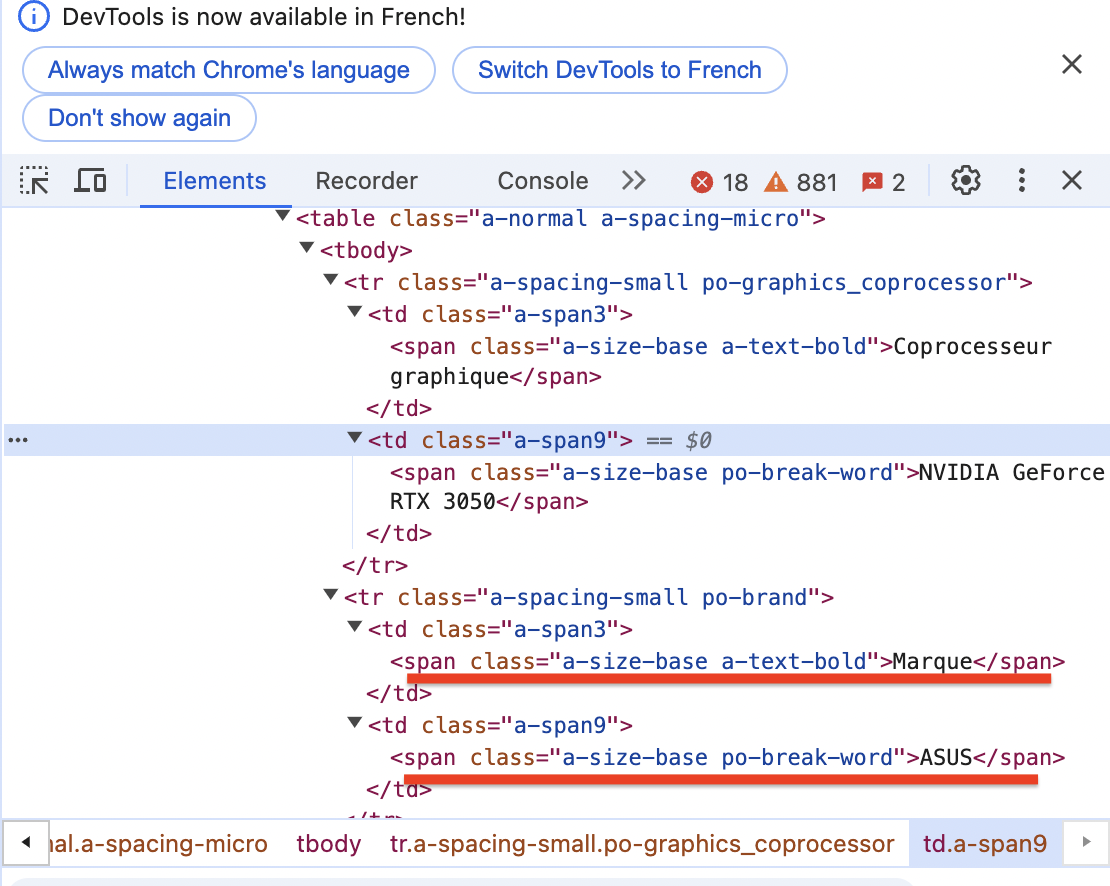

In [ ]:
df = pd.read_csv('Table_7.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nom            133 non-null    object 
 1   URL            133 non-null    object 
 2   Prix (‚Ç¨)       133 non-null    object 
 3   √âtoiles        133 non-null    float64
 4   Nombre d'Avis  133 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.3+ KB


In [ ]:
user_agents = [
    # Chrome - Windows
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36",

    # Chrome - macOS
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_2_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.6261.95 Safari/537.36",

    # Firefox - Windows
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:123.0) Gecko/20100101 Firefox/123.0",

    # Safari - macOS
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_6_8) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Safari/605.1.15",

    # Edge - Windows
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.2365.66",

    # Chrome - Android
    "Mozilla/5.0 (Linux; Android 11; SM-A515F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Mobile Safari/537.36",

    # Firefox - Linux
    "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:123.0) Gecko/20100101 Firefox/123.0"
]


headers = {
    "User-Agent": random.choice(user_agents),
    "Accept-Language": "fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "DNT": "1",  # Do Not Track
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Site": "same-origin",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-User": "?1",
    "Sec-Fetch-Dest": "document"
}



# Liste des caract√©ristiques qu'on veut r√©cup√©rer

spec_targets = [
    "Coprocesseur graphique",
    "Marque",
    "Taille de la RAM graphique",
    "Vitesse d'horloge du GPU",
    "Interface de sortie vid√©o",
    "Fabricant de processeurs graphiques",
    "Type de RAM graphique",
    "Usages recommand√©s pour le produit",
    "Composants inclus",
    "Appareils compatibles"
]

# Fonction qui r√©cup√®re ces caract√©ristiques pour une url donn√©e

def scrape_specs_flexible(url):

    data = {}

    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code != 200:
            return

        soup = BeautifulSoup(response.text, "html.parser")

        # Trouver toutes les paires nom : valeur

        labels = soup.find_all("span", class_="a-size-base a-text-bold") # Par-exemple, marque ou taille de RAM sera √©crit ici
        for label in labels:
            nom = label.get_text(strip=True).rstrip(":")
            if nom in spec_targets:
                value_span = label.find_next("span", class_="a-size-base po-break-word") # Puis la valeur sera √©crite ici
                if value_span:
                    data[nom] = value_span.get_text(strip=True)

    except Exception as e:
        print(f"‚ö†Ô∏è Erreur pour {url} : {e}")

    return data



In [ ]:
scrape_specs_flexible("https://www.amazon.fr/MSI-2GD3H-Graphique-Nvidia-Express/dp/B01AY78MLM/ref=sr_1_2")

{'Coprocesseur graphique': 'NVIDIA GeForce GT 710',
 'Marque': 'MSI',
 'Taille de la RAM graphique': '2 Go',
 "Vitesse d'horloge du GPU": '954 MHz',
 'Interface de sortie vid√©o': 'DisplayPort',
 'Fabricant de processeurs graphiques': 'NVIDIA',
 'Type de RAM graphique': 'M√©moire GDDR3',
 'Usages recommand√©s pour le produit': 'Bureau',
 'Composants inclus': 'GT 710 2GD3H LP x 1',
 'Appareils compatibles': 'Cellphone'}

In [ ]:
specs_list = []
for i, url in enumerate(df["URL"]):
  print(f"üîé Scraping {i+1}/{len(df)} : {url}")
  specs = scrape_specs_flexible(url)
  specs_list.append(specs)
  time.sleep(random.uniform(1.5, 3.0))  # Pause anti-blocage

üîé Scraping 1/133 : https://www.amazon.fr/MSI-2GD3H-Graphique-Nvidia-Express/dp/B01AY78MLM
üîé Scraping 2/133 : https://www.amazon.fr/MSI-Carte-graphique-VENTUS-912-V397-039/dp/B08WHJFYM8
üîé Scraping 3/133 : https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/dp/B09Y57F1HL
üîé Scraping 4/133 : https://www.amazon.fr/GIGABYTE-RX7600-XT-Gaming-OC-16GD/dp/B0CSSZCZZP
üîé Scraping 5/133 : https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-GAMING-graphique/dp/B0C8ZS7N73
üîé Scraping 6/133 : https://www.amazon.fr/ASUS-GeForce-Graphique-DisplayPort-DUAL-RTX3050-O6G/dp/B086ZSQZZ7
üîé Scraping 7/133 : https://www.amazon.fr/PNY-Carte-Graphique-GeForce-RTXTM/dp/B0CZ188QHG
üîé Scraping 8/133 : https://www.amazon.fr/Gigabyte-GeForce-Graphique-Gaming-V2/dp/B096Y2TYKV
üîé Scraping 9/133 : https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-EAGLE-graphique/dp/B0C8ZRMDC3
üîé Scraping 10/133 : https://www.amazon.fr/MSI-GeForce-RTX-3050-Ventus/dp/B0BSN1QFXX
üîé Scraping 11/133 : https://www.amazon.fr/GIGABYTE-C

KeyboardInterrupt: 

In [ ]:
specs_list

In [ ]:

specs_list = [specs for specs in specs_list if specs and specs != {}]
specs_list


In [ ]:
df_specs = pd.DataFrame(specs_list)


In [ ]:
df_specs

In [ ]:
df

In [ ]:
df_final = pd.concat([df.reset_index(drop=True), df_specs], axis=1)

In [ ]:
df_final

In [ ]:
#df_final.to_csv('Table_8.csv', index=False)

In [ ]:
df = pd.read_csv('Table_8.csv')

In [ ]:
df

Nom  \
0    MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...   
1    MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...   
2    MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...   
3                    GIGABYTE RX7600 XT Gaming OC-16GD   
4    Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...   
..                                                 ...   
128  MSI B760 B760 GAMING PLUS WIFI Carte M√®re, ATX...   
129  GIGABYTE B550M DS3H Carte m√®re - Processeurs A...   
130                   GIGABYTE B550 AORUS Elite V2 ATX   
131  MSI Pro H610M-E DDR4 Carte m√®re, Micro-ATX - p...   
132  upHere gaming GPU Brace Carte Graphique ARGB L...   

                                                   URL Prix (‚Ç¨)  √âtoiles  \
0    https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...    40,85      4.5   
1    https://www.amazon.fr/MSI-Carte-graphique-VENT...   260,62      4.6   
2    https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...   189,20      4.6   
3    https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...   301,65      4.1   
4    https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...   300,99      4.7   
..                                                 ...      ...      ...   
128  https://www.amazon.fr/MSI-B760-Gaming-Plus-WiF...   137,87      4.5   
129  https://www.amazon.fr/GIGABYTE-Carte-Mere-B550...    76,56      4.3   
130  https://www.amazon.fr/GIGABYTE-B550-AORUS-Elit...   106,08      4.4   
131  https://www.amazon.fr/MSI-H610M-DDR4-LGA1700-M...    58,25      4.3   
132  https://www.amazon.fr/upHere-gaming-Graphique-...    12,49      4.3   

     Nombre d'Avis   Coprocesseur graphique    Marque  \
0             9961    NVIDIA GeForce GT 710       MSI   
1             2880  NVIDIA GeForce RTX 3060       MSI   
2              438         GeForce RTX 3050       MSI   
3              223    AMD Radeon RX 7600 XT  GIGABYTE   
4              876  NVIDIA GeForce RTX 3050      ASUS   
..             ...                      ...       ...   
128           1941                      NaN       NaN   
129           1803                      NaN       NaN   
130           1864                      NaN       NaN   
131            396                      NaN       NaN   
132             55                      NaN       NaN   

    Taille de la RAM graphique Vitesse d'horloge du GPU  \
0                         2 Go                  954 MHz   
1                        12 Go                 1807 MHz   
2                         8 Go                 1807 MHz   
3                        16 Go                 2810 MHz   
4                         6 Go                 4000 MHz   
..                         ...                      ...   
128                        NaN                      NaN   
129                        NaN                      NaN   
130                        NaN                      NaN   
131                        NaN                      NaN   
132                        NaN                      NaN   

    Interface de sortie vid√©o Fabricant de processeurs graphiques  \
0                 DisplayPort                              NVIDIA   
1           DisplayPort, HDMI                              NVIDIA   
2      DisplayPort, DVI, HDMI                              NVIDIA   
3           DisplayPort, HDMI                                 AMD   
4           DisplayPort, HDMI                              NVIDIA   
..                        ...                                 ...   
128                       NaN                                 NaN   
129                       NaN                                 NaN   
130                       NaN                                 NaN   
131                       NaN                                 NaN   
132                       NaN                                 NaN   

    Type de RAM graphique Usages recommand√©s pour le produit  \
0           M√©moire GDDR3                             Bureau   
1           M√©moire GDDR6                                Jeu   
2           M√©m

---

#### *2.2.2 Nettoyage de la base techniques*

Commen√ßons par enlever les valeurs manquantes et les doublons :

In [ ]:
# On enl√®ve les lignes avec un "Non disponible"

columns_to_check = ['Coprocesseur graphique', 'Marque', 'Taille de la RAM graphique',
                    "Vitesse d'horloge du GPU", 'Interface de sortie vid√©o',
                    'Fabricant de processeurs graphiques', 'Type de RAM graphique',
                    'Usages recommand√©s pour le produit', 'Composants inclus',
                    'Appareils compatibles']

for col in columns_to_check:
    if col in df.columns:
        df = df[df[col] != "Non disponible"]

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(subset=['Nom'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Nom                                  64 non-null     object 
 1   URL                                  64 non-null     object 
 2   Prix (‚Ç¨)                             64 non-null     object 
 3   √âtoiles                              64 non-null     float64
 4   Nombre d'Avis                        64 non-null     int64  
 5   Coprocesseur graphique               64 non-null     object 
 6   Marque                               64 non-null     object 
 7   Taille de la RAM graphique           64 non-null     object 
 8   Vitesse d'horloge du GPU             64 non-null     object 
 9   Interface de sortie vid√©o            64 non-null     object 
 10  Fabricant de processeurs graphiques  64 non-null     object 
 11  Type de RAM graphique         

In [ ]:
print("Nombre de valeurs:\n", df.describe(include='all').loc[['count']])

print("\nNombre de valeurs uniques:\n", df.describe(include='all').loc[['unique']])


Nombre de valeurs:
       Nom URL Prix (‚Ç¨)  √âtoiles  Nombre d'Avis Coprocesseur graphique Marque  \
count  64  64       64     64.0           64.0                     64     64   

      Taille de la RAM graphique Vitesse d'horloge du GPU  \
count                         64                       64   

      Interface de sortie vid√©o Fabricant de processeurs graphiques  \
count                        64                                  64   

      Type de RAM graphique Usages recommand√©s pour le produit  \
count                    64                                 64   

      Composants inclus Appareils compatibles  
count                64                    64  

Nombre de valeurs uniques:
        Nom URL Prix (‚Ç¨)  √âtoiles  Nombre d'Avis Coprocesseur graphique Marque  \
unique  64  64       62      NaN            NaN                     42     11   

       Taille de la RAM graphique Vitesse d'horloge du GPU  \
unique                         16                       48   


On ne se retrouve plus que avec $64$ cartes graphiques diff√©rentes, c'est peu...

On va transformer les colonnes en num√©rique pour les √©tudier :

In [ ]:
df.head(64)

Nom  \
0   MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...   
1   MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...   
2   MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...   
3                   GIGABYTE RX7600 XT Gaming OC-16GD   
4   Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...   
..                                                ...   
59  Zotac GeForce GT 710 2Go GDDR3 1xHDMI, GT 710 ...   
60  Sapphire Pulse AMD Radeon‚Ñ¢ RX 6500 XT ITX Pure...   
61  MSI RTX 3050 Aero ITX 8G OC Carte Graphique V8...   
62  MAXSUN Geforce GTX 1050 Ti 4 Go GDDR5 128 bits...   
63               EZDIY-FAB FR2-4.0CM Muti GPU-W Cable   

                                                  URL Prix (‚Ç¨)  √âtoiles  \
0   https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...    40,85      4.5   
1   https://www.amazon.fr/MSI-Carte-graphique-VENT...   260,62      4.6   
2   https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...   189,20      4.6   
3   https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...   301,65      4.1   
4   https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...   300,99      4.7   
..                                                ...      ...      ...   
59  https://www.amazon.fr/Zotac-GT-710-Fan-Sink/dp...    56,18      4.1   
60  https://www.amazon.fr/Sapphire-Pulse-RadeonTM-...   145,33      4.4   
61  https://www.amazon.fr/MSI-3050-Carte-Graphique...   338,09      4.5   
62  https://www.amazon.fr/MAXSUN-GTX-1050Ti-Transf...   135,82      4.1   
63  https://www.amazon.fr/EZDIY-FAB-Support-Graphi...    55,41      4.0   

    Nombre d'Avis   Coprocesseur graphique    Marque  \
0            9961    NVIDIA GeForce GT 710       MSI   
1            2880  NVIDIA GeForce RTX 3060       MSI   
2             438         GeForce RTX 3050       MSI   
3             223    AMD Radeon RX 7600 XT  GIGABYTE   
4             876  NVIDIA GeForce RTX 3050      ASUS   
..            ...                      ...       ...   
59            219         GeForce RTX 3050      ASUS   
60              6   NVIDIA GeForce GT 1030    maxsun   
61            469    NVIDIA GeForce GT 730    SAPLOS   
62             71        AMD Radeon RX 550    QTHREE   
63             11    NVIDIA GeForce GT 730    QTHREE   

   Taille de la RAM graphique Vitesse d'horloge du GPU  \
0                        2 Go                  954 MHz   
1                       12 Go                 1807 MHz   
2                        8 Go                 1807 MHz   
3                       16 Go                 2810 MHz   
4                        6 Go                 4000 MHz   
..                        ...                      ...   
59                       5 Go                 1537 MHz   
60                       2 Go                 1468 MHz   
61                       4 Go                  902 MHz   
62                       4 Go                 1183 MHz   
63                       4 Go                  700 MHz   

   Interface de sortie vid√©o Fabricant de processeurs graphiques  \
0                DisplayPort                              NVIDIA   
1          DisplayPort, HDMI                              NVIDIA   
2     DisplayPort, DVI, HDMI                              NVIDIA   
3          DisplayPort, HDMI                                 AMD   
4          DisplayPort, HDMI                              NVIDIA   
..                       ...                                 ...   
59               PCI Express                              NVIDIA   
60                 DVI, HDMI                              NVIDIA   
61    VGA, DisplayPort, HDMI                              NVIDIA   
62            VGA, DVI, HDMI                                 AMD   
63            VGA, DVI, HDMI                              NVIDIA   

   Type de RAM graphique Usages recommand√©s pour le produit  \
0          M√©moire GDDR3                             Bureau   
1          M√©moire GDDR6                                Jeu   
2          M√©moire GDDR6                                Jeu   
3          M√©m

In [ ]:
#df.to_csv('Table_9.csv', index=False)

In [ ]:
df = pd.read_csv('Table_9.csv')

# Nettoyage des colonnes texte vers num√©rique

# RAM graphique (en Go)

df["Taille RAM (Go)"] = df["Taille de la RAM graphique"].astype(str).str.extract(r'(\d+)', expand=False)
df["Taille RAM (Go)"] = pd.to_numeric(df["Taille RAM (Go)"], errors="coerce")

# Horloge GPU (MHz)

df["Horloge GPU (MHz)"] = df["Vitesse d'horloge du GPU"].astype(str).str.extract(r'(\d+)', expand=False)
df["Horloge GPU (MHz)"] = pd.to_numeric(df["Horloge GPU (MHz)"], errors="coerce")

#Prix

df["Prix"] = df["Prix (‚Ç¨)"].astype(str).str.extract(r'(\d+)', expand=False)
df["Prix"] = pd.to_numeric(df["Prix"], errors="coerce")



In [ ]:
df

Nom  \
0   MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...   
1   MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...   
2   MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...   
3                   GIGABYTE RX7600 XT Gaming OC-16GD   
4   Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...   
..                                                ...   
59  Zotac GeForce GT 710 2Go GDDR3 1xHDMI, GT 710 ...   
60  Sapphire Pulse AMD Radeon‚Ñ¢ RX 6500 XT ITX Pure...   
61  MSI RTX 3050 Aero ITX 8G OC Carte Graphique V8...   
62  MAXSUN Geforce GTX 1050 Ti 4 Go GDDR5 128 bits...   
63               EZDIY-FAB FR2-4.0CM Muti GPU-W Cable   

                                                  URL Prix (‚Ç¨)  √âtoiles  \
0   https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...    40,85      4.5   
1   https://www.amazon.fr/MSI-Carte-graphique-VENT...   260,62      4.6   
2   https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...   189,20      4.6   
3   https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...   301,65      4.1   
4   https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...   300,99      4.7   
..                                                ...      ...      ...   
59  https://www.amazon.fr/Zotac-GT-710-Fan-Sink/dp...    56,18      4.1   
60  https://www.amazon.fr/Sapphire-Pulse-RadeonTM-...   145,33      4.4   
61  https://www.amazon.fr/MSI-3050-Carte-Graphique...   338,09      4.5   
62  https://www.amazon.fr/MAXSUN-GTX-1050Ti-Transf...   135,82      4.1   
63  https://www.amazon.fr/EZDIY-FAB-Support-Graphi...    55,41      4.0   

    Nombre d'Avis   Coprocesseur graphique    Marque  \
0            9961    NVIDIA GeForce GT 710       MSI   
1            2880  NVIDIA GeForce RTX 3060       MSI   
2             438         GeForce RTX 3050       MSI   
3             223    AMD Radeon RX 7600 XT  GIGABYTE   
4             876  NVIDIA GeForce RTX 3050      ASUS   
..            ...                      ...       ...   
59            219         GeForce RTX 3050      ASUS   
60              6   NVIDIA GeForce GT 1030    maxsun   
61            469    NVIDIA GeForce GT 730    SAPLOS   
62             71        AMD Radeon RX 550    QTHREE   
63             11    NVIDIA GeForce GT 730    QTHREE   

   Taille de la RAM graphique Vitesse d'horloge du GPU  \
0                        2 Go                  954 MHz   
1                       12 Go                 1807 MHz   
2                        8 Go                 1807 MHz   
3                       16 Go                 2810 MHz   
4                        6 Go                 4000 MHz   
..                        ...                      ...   
59                       5 Go                 1537 MHz   
60                       2 Go                 1468 MHz   
61                       4 Go                  902 MHz   
62                       4 Go                 1183 MHz   
63                       4 Go                  700 MHz   

   Interface de sortie vid√©o Fabricant de processeurs graphiques  \
0                DisplayPort                              NVIDIA   
1          DisplayPort, HDMI                              NVIDIA   
2     DisplayPort, DVI, HDMI                              NVIDIA   
3          DisplayPort, HDMI                                 AMD   
4          DisplayPort, HDMI                              NVIDIA   
..                       ...                                 ...   
59               PCI Express                              NVIDIA   
60                 DVI, HDMI                              NVIDIA   
61    VGA, DisplayPort, HDMI                              NVIDIA   
62            VGA, DVI, HDMI                                 AMD   
63            VGA, DVI, HDMI                              NVIDIA   

   Type de RAM graphique Usages recommand√©s pour le produit  \
0          M√©moire GDDR3                             Bureau   
1          M√©moire GDDR6                                Jeu   
2          M√©moire GDDR6                                Jeu   
3          M√©m

In [ ]:
#df.to_csv('Table_9.csv', index=False)

---

#### *2.2.3 Analyse graphique*

Tra√ßons quelques courbes :

In [ ]:
df = pd.read_csv("Table_9.csv")

In [ ]:
df

Nom  \
0   MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...   
1   MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...   
2   MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...   
3                   GIGABYTE RX7600 XT Gaming OC-16GD   
4   Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...   
..                                                ...   
59  Zotac GeForce GT 710 2Go GDDR3 1xHDMI, GT 710 ...   
60  Sapphire Pulse AMD Radeon‚Ñ¢ RX 6500 XT ITX Pure...   
61  MSI RTX 3050 Aero ITX 8G OC Carte Graphique V8...   
62  MAXSUN Geforce GTX 1050 Ti 4 Go GDDR5 128 bits...   
63               EZDIY-FAB FR2-4.0CM Muti GPU-W Cable   

                                                  URL Prix (‚Ç¨)  √âtoiles  \
0   https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...    40,85      4.5   
1   https://www.amazon.fr/MSI-Carte-graphique-VENT...   260,62      4.6   
2   https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...   189,20      4.6   
3   https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...   301,65      4.1   
4   https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...   300,99      4.7   
..                                                ...      ...      ...   
59  https://www.amazon.fr/Zotac-GT-710-Fan-Sink/dp...    56,18      4.1   
60  https://www.amazon.fr/Sapphire-Pulse-RadeonTM-...   145,33      4.4   
61  https://www.amazon.fr/MSI-3050-Carte-Graphique...   338,09      4.5   
62  https://www.amazon.fr/MAXSUN-GTX-1050Ti-Transf...   135,82      4.1   
63  https://www.amazon.fr/EZDIY-FAB-Support-Graphi...    55,41      4.0   

    Nombre d'Avis   Coprocesseur graphique    Marque  \
0            9961    NVIDIA GeForce GT 710       MSI   
1            2880  NVIDIA GeForce RTX 3060       MSI   
2             438         GeForce RTX 3050       MSI   
3             223    AMD Radeon RX 7600 XT  GIGABYTE   
4             876  NVIDIA GeForce RTX 3050      ASUS   
..            ...                      ...       ...   
59            219         GeForce RTX 3050      ASUS   
60              6   NVIDIA GeForce GT 1030    maxsun   
61            469    NVIDIA GeForce GT 730    SAPLOS   
62             71        AMD Radeon RX 550    QTHREE   
63             11    NVIDIA GeForce GT 730    QTHREE   

   Taille de la RAM graphique Vitesse d'horloge du GPU  \
0                        2 Go                  954 MHz   
1                       12 Go                 1807 MHz   
2                        8 Go                 1807 MHz   
3                       16 Go                 2810 MHz   
4                        6 Go                 4000 MHz   
..                        ...                      ...   
59                       5 Go                 1537 MHz   
60                       2 Go                 1468 MHz   
61                       4 Go                  902 MHz   
62                       4 Go                 1183 MHz   
63                       4 Go                  700 MHz   

   Interface de sortie vid√©o Fabricant de processeurs graphiques  \
0                DisplayPort                              NVIDIA   
1          DisplayPort, HDMI                              NVIDIA   
2     DisplayPort, DVI, HDMI                              NVIDIA   
3          DisplayPort, HDMI                                 AMD   
4          DisplayPort, HDMI                              NVIDIA   
..                       ...                                 ...   
59               PCI Express                              NVIDIA   
60                 DVI, HDMI                              NVIDIA   
61    VGA, DisplayPort, HDMI                              NVIDIA   
62            VGA, DVI, HDMI                                 AMD   
63            VGA, DVI, HDMI                              NVIDIA   

   Type de RAM graphique Usages recommand√©s pour le produit  \
0          M√©moire GDDR3                             Bureau   
1          M√©moire GDDR6                                Jeu   
2          M√©moire GDDR6                                Jeu   
3          M√©m

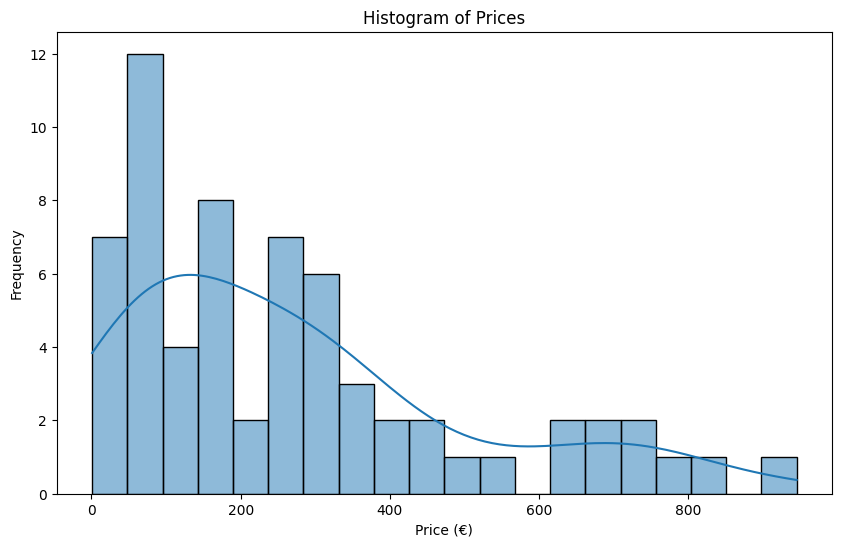

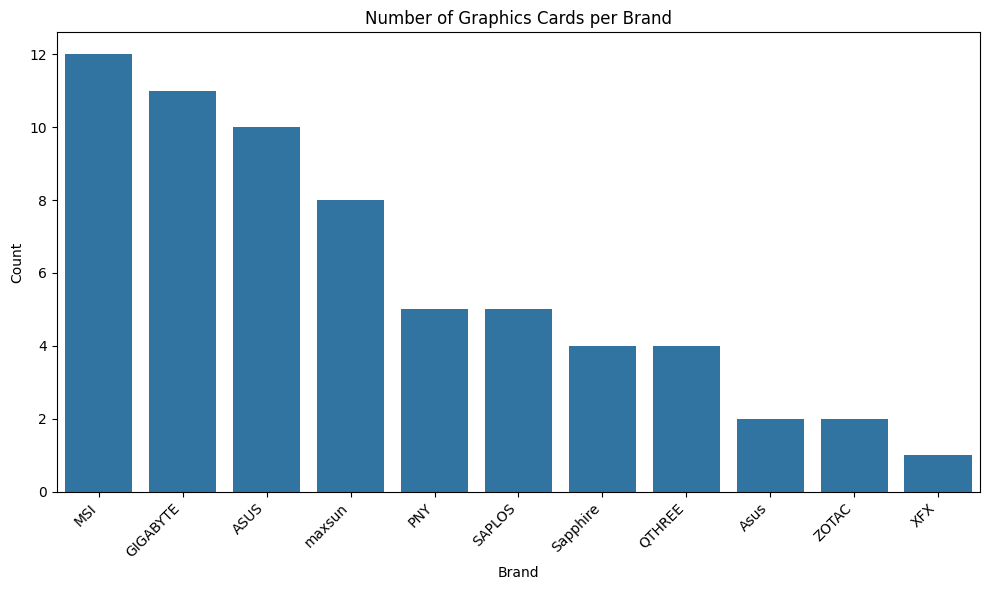

In [ ]:

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Prix'], bins=20, kde=True)
plt.title('Histogram of Prices')
plt.xlabel('Price (‚Ç¨)')
plt.ylabel('Frequency')
plt.show()


# Create the bar plot
brand_counts = df['Marque'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Number of Graphics Cards per Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


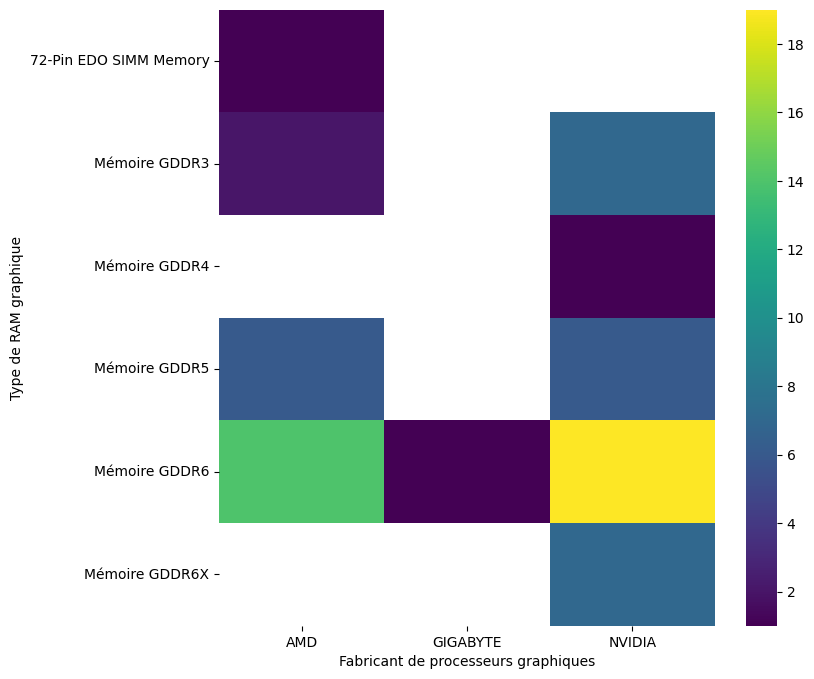

In [ ]:
# @title Fabricant de processeurs graphiques vs Type de RAM graphique

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Type de RAM graphique'].value_counts()
    for x_label, grp in df.groupby('Fabricant de processeurs graphiques')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Fabricant de processeurs graphiques')
_ = plt.ylabel('Type de RAM graphique')

<ipython-input-109-f99dc19664b3>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




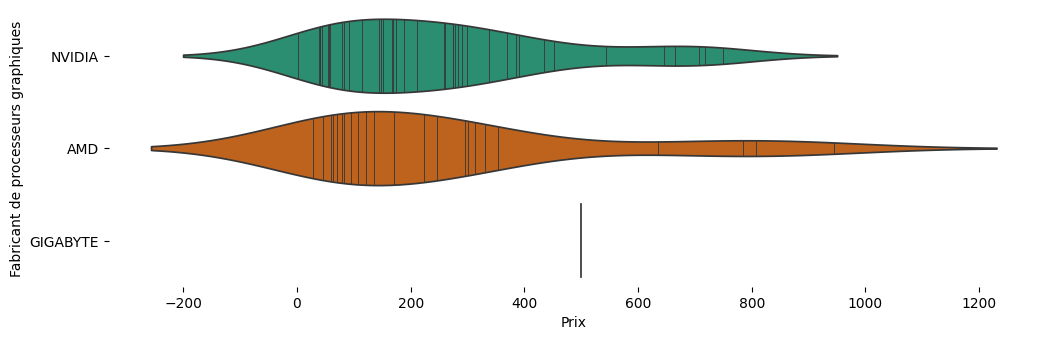

In [ ]:
# @title Fabricant de processeurs graphiques vs Prix

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Fabricant de processeurs graphiques'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Prix', y='Fabricant de processeurs graphiques', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-110-d28a90581d79>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




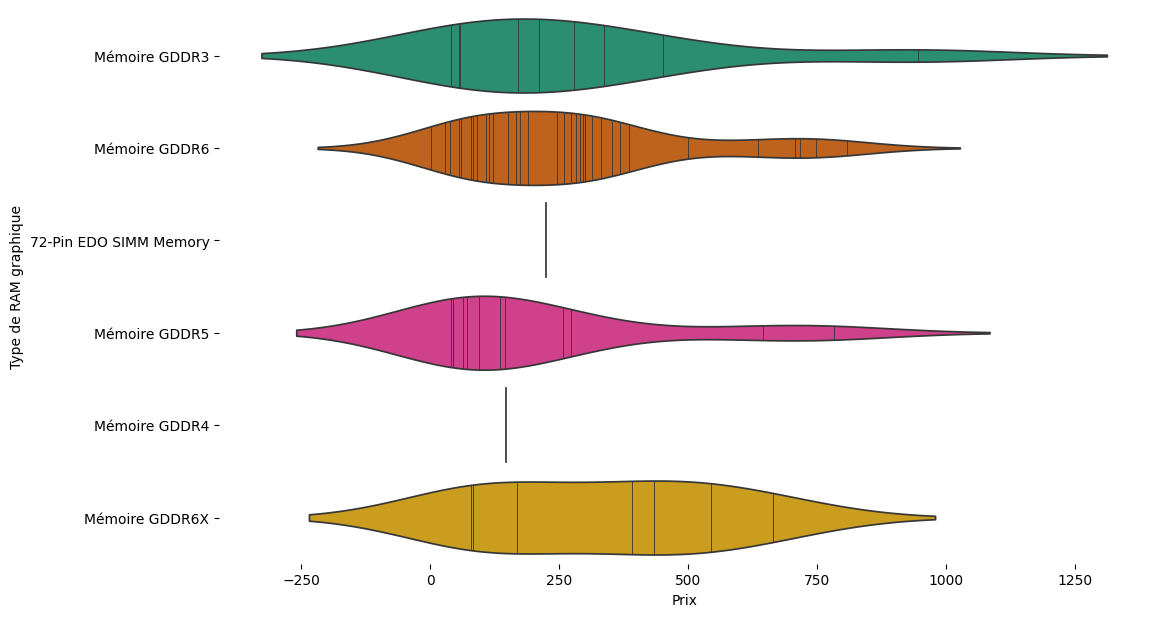

In [ ]:
# @title Type de RAM graphique vs Prix

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Type de RAM graphique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Prix', y='Type de RAM graphique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

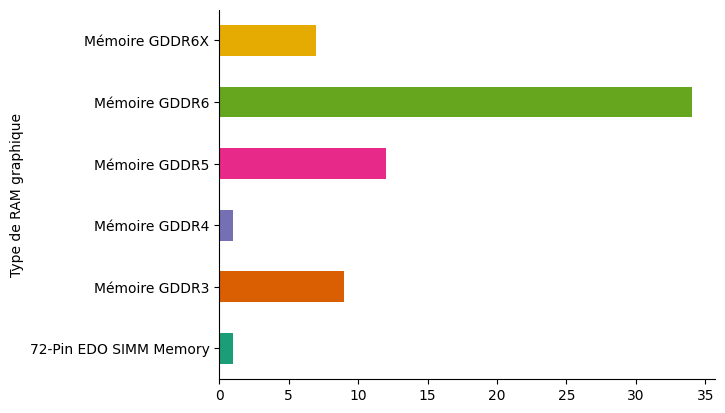

In [ ]:
# @title Type de RAM graphique

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Type de RAM graphique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

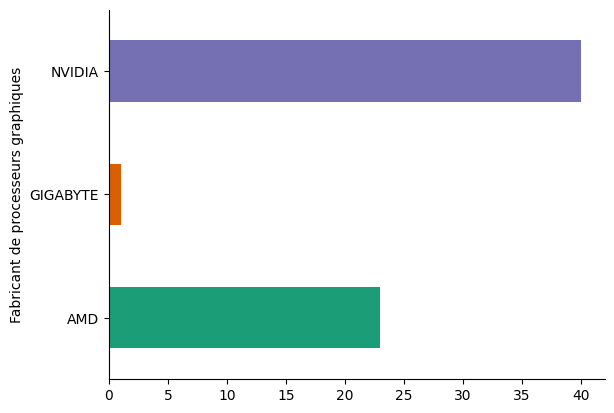

In [ ]:
# @title Fabricant de processeurs graphiques

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Fabricant de processeurs graphiques').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

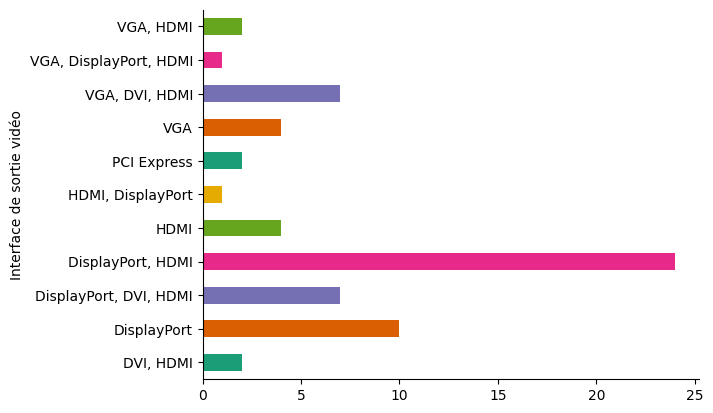

In [ ]:
# @title Interface de sortie vid√©o

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Interface de sortie vid√©o').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Taille RAM (Go)", y="Prix",
                 color="√âtoiles", size="Nombre d'Avis",
                 title="Prix en fonction de la RAM graphique",
                 labels={"Prix": "Prix (‚Ç¨)", "Taille RAM (Go)": "RAM (Go)"})

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[2, 4, 6, 8, 16],
        range=[1, 18],
        title="RAM (Go)"
    )
)
fig.show()


In [ ]:
fig = px.scatter(df, x="Horloge GPU (MHz)", y="Prix",
                 color="Taille RAM (Go)", size="Nombre d'Avis",
                 title="Prix vs Fr√©quence GPU",
                 labels={"Prix": "Prix (‚Ç¨)", "Horloge GPU (MHz)": "Fr√©quence GPU (MHz)"})
fig.show()


In [ ]:
fig = px.box(df, x="Taille RAM (Go)", y="Prix", points="all",
             title="Distribution des prix selon la RAM graphique")

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[2, 4, 6, 8, 16],
        range=[1, 18],
        title="RAM (Go)"
    )
)

fig.show()


In [ ]:
import plotly.figure_factory as ff

corr_data = df[["Prix", "√âtoiles", "Nombre d'Avis", "Taille RAM (Go)", "Horloge GPU (MHz)"]].corr().round(2)
fig = ff.create_annotated_heatmap(
    z=corr_data.values,
    x=corr_data.columns.tolist(),
    y=corr_data.columns.tolist(),
    colorscale='RdBu', showscale=True)
fig.update_layout(title="Matrice de corr√©lation entre les variables")
fig.show()


In [ ]:

fig = px.box(
    df,
    x="Marque",
    y="Prix",
    points="all",  # affiche aussi les points individuels
    title="Prix des cartes graphiques par marque",
    labels={"Prix": "Prix (‚Ç¨)", "Marque": "Marque"},
    color="Marque"
)

fig.update_layout(
    xaxis_title="Marque",
    yaxis_title="Prix (‚Ç¨)",
    template="plotly_white",
    xaxis_tickangle=45
)

fig.show()


explication freq vitesse carte graphique ram etc

---

## **3 Mod√®le de machine learning pour pr√©dire si best seller ou non**

moiti√© bestseller moiti√© non et on cherche les features qui ont le plus de poids pour pr√©dire si un article est bestseller ou pas

avec les caract√©ristiques du produit

KNN (k-nearest neighbors)	‚úÖ	Marche tr√®s bien en petite dimension
Na√Øf Bayes	‚úÖ	Rapide, robuste, bonne baseline
Logistic Regression (binaire)	‚úÖ	Tr√®s bien pour classer best seller / non-best seller


Sur-apprentissage (overfitting) tr√®s probable

R√©sultats peu g√©n√©ralisables


Utilise peu de variables

Binarise les classes (ex : "Best Seller" = 1, sinon 0)

validation crois√©e cross_val_score avec cv=5



bons mod√®les pour peu de donnees :

KNN, Na√Øf Bayes, Logistic Regression (random forest? comparaison des modeles)